In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, linregress
import numpy as np
import pandas as pd
import seaborn as sns

# Climate Change Impact On Agriculture

In [2]:
# import csv
cc_impact_on_ag_df = pd.read_csv('Resources/climate_change_impact_on_agriculture_2024.csv')
cc_impact_on_ag_df.head()

Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

In [3]:
# check columns
columns_list = cc_impact_on_ag_df.columns.tolist()
columns_list

['Year',
 'Country',
 'Region',
 'Crop_Type',
 'Average_Temperature_C',
 'Total_Precipitation_mm',
 'CO2_Emissions_MT',
 'Crop_Yield_MT_per_HA',
 'Extreme_Weather_Events',
 'Irrigation_Access_%',
 'Pesticide_Use_KG_per_HA',
 'Fertilizer_Use_KG_per_HA',
 'Soil_Health_Index',
 'Adaptation_Strategies',
 'Economic_Impact_Million_USD']

In [4]:
# check data types
cc_impact_on_ag_df.dtypes

Year                             int64
Country                         object
Region                          object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events           int64
Irrigation_Access_%            float64
Pesticide_Use_KG_per_HA        float64
Fertilizer_Use_KG_per_HA       float64
Soil_Health_Index              float64
Adaptation_Strategies           object
Economic_Impact_Million_USD    float64
dtype: object

## Bar Charts

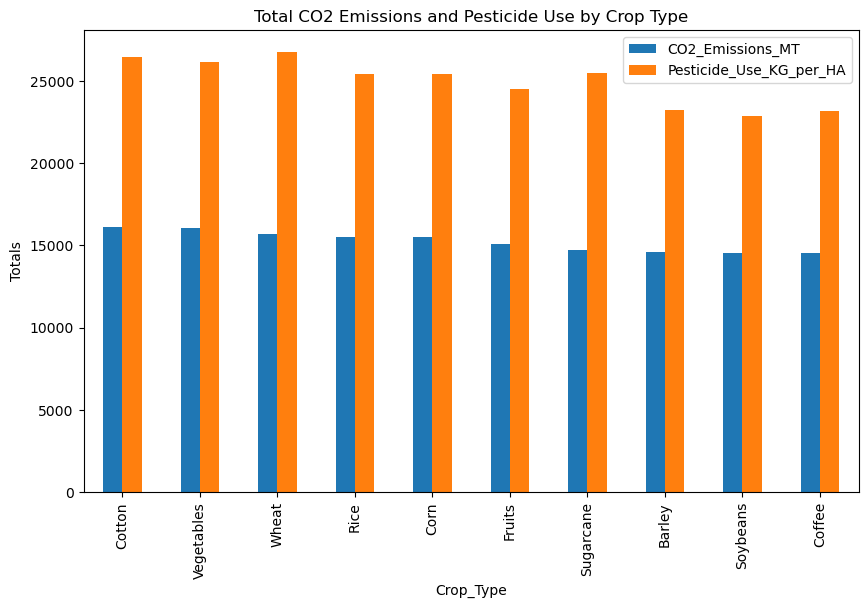

In [5]:
# Crops: CO2 emissions and pesticide use sum, sorted by CO2 emissions
grouped_data = cc_impact_on_ag_df.groupby('Crop_Type')[['CO2_Emissions_MT', 'Pesticide_Use_KG_per_HA']].sum()
grouped_data = grouped_data.sort_values(by='CO2_Emissions_MT', ascending=False)

grouped_data.plot(kind='bar', figsize=(10,6))
plt.title('Total CO2 Emissions and Pesticide Use by Crop Type')
plt.ylabel('Totals')

plt.show()

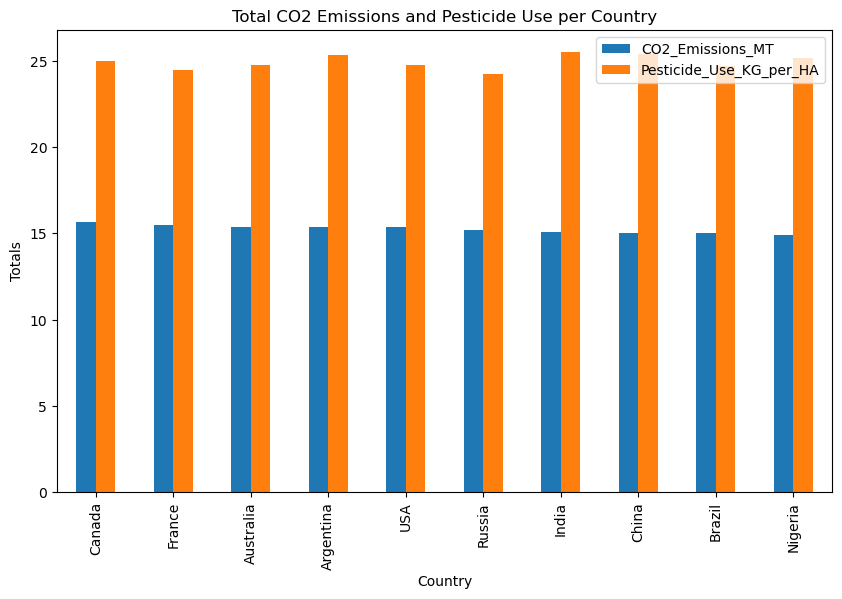

In [6]:
# Countries: CO2 emissions and pesticide use mean, sorted by CO2 emissions
grouped_data = cc_impact_on_ag_df.groupby('Country')[['CO2_Emissions_MT', 'Pesticide_Use_KG_per_HA']].mean()
grouped_data = grouped_data.sort_values(by='CO2_Emissions_MT', ascending=False)

grouped_data.plot(kind='bar', figsize=(10,6))
plt.title('Total CO2 Emissions and Pesticide Use per Country')
plt.ylabel('Totals')

plt.show()

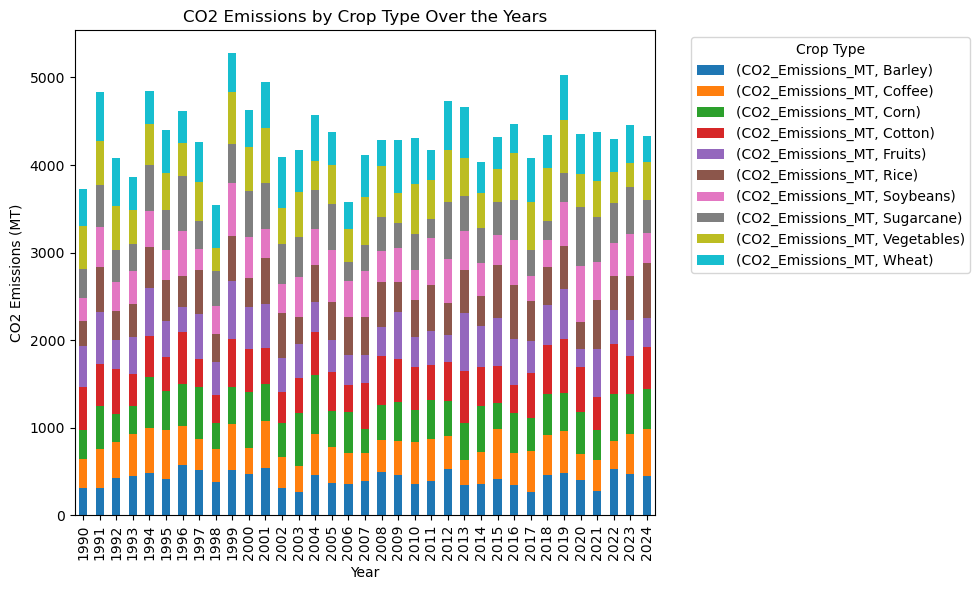

In [7]:
# Grouping and stacking the data
stacked_data = cc_impact_on_ag_df.groupby(['Year', 'Crop_Type'])[['CO2_Emissions_MT']].sum().unstack()

# Plotting the stacked bar chart
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10,6))

# Add title and labels
plt.title('CO2 Emissions by Crop Type Over the Years')
plt.ylabel('CO2 Emissions (MT)')

# Move the legend outside of the plot
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
def plot_bar_matplotlib(df, categorical_var, quantitative_var, agg_func):

    # Grouping the data by the categorical variable and applying the aggregation function
    if agg_func == 'sum':
        grouped_data = df.groupby(categorical_var)[quantitative_var].sum()
    elif agg_func == 'mean':
        grouped_data = df.groupby(categorical_var)[quantitative_var].mean()
    else:
        raise ValueError("agg_func must be either 'sum' or 'mean'")

    grouped_data = grouped_data.sort_values(ascending=True)

    # Creating the bar chart
    plt.bar(grouped_data.index, grouped_data.values)
    plt.xlabel(categorical_var)
    plt.ylabel(f"{agg_func.capitalize()} {quantitative_var}")
    plt.title(f"{agg_func.capitalize()} {quantitative_var} by {categorical_var}")
    plt.xticks(rotation=45)  
    plt.show()


### Crop types

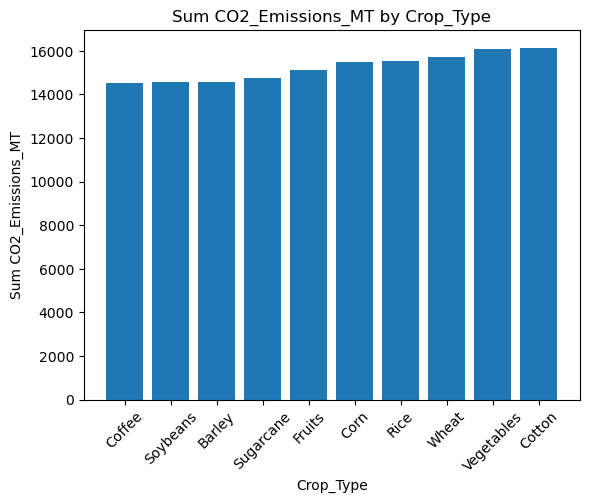

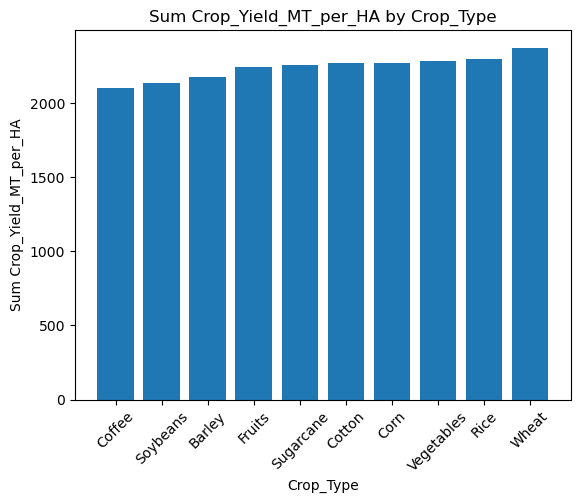

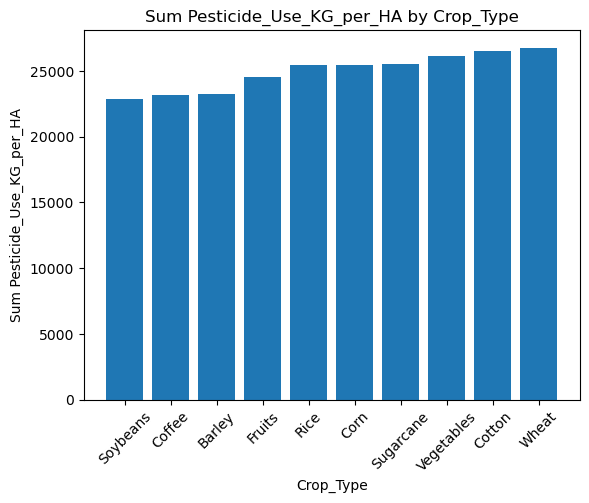

In [9]:
# List of quantitative variables to loop through
crop_vars = ['CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA']

# Loop through each quantitative variable
for var in crop_vars:
    plot_bar_matplotlib(cc_impact_on_ag_df, 'Crop_Type', var, agg_func='sum')

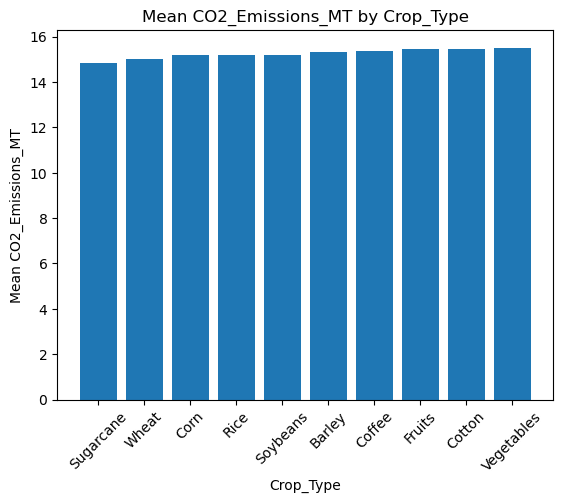

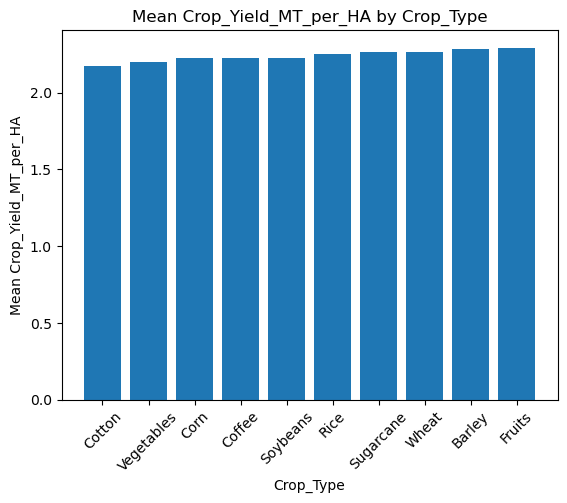

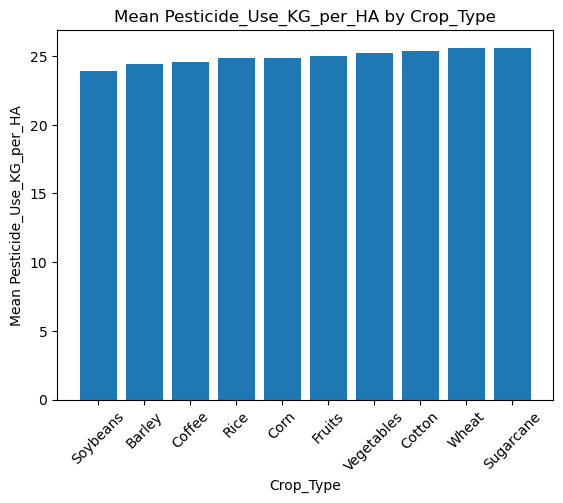

In [10]:
# List of quantitative variables to loop through
crop_vars = ['CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA']

# Loop through each quantitative variable
for var in crop_vars:
    plot_bar_matplotlib(cc_impact_on_ag_df, 'Crop_Type', var, agg_func='mean')

### Adaptation Strategies

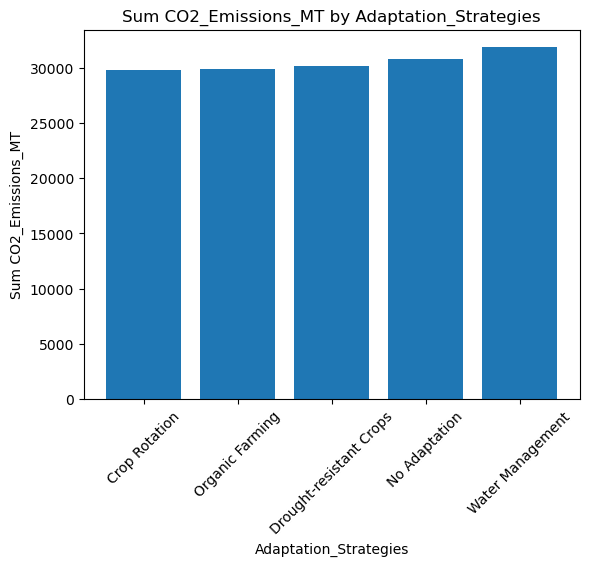

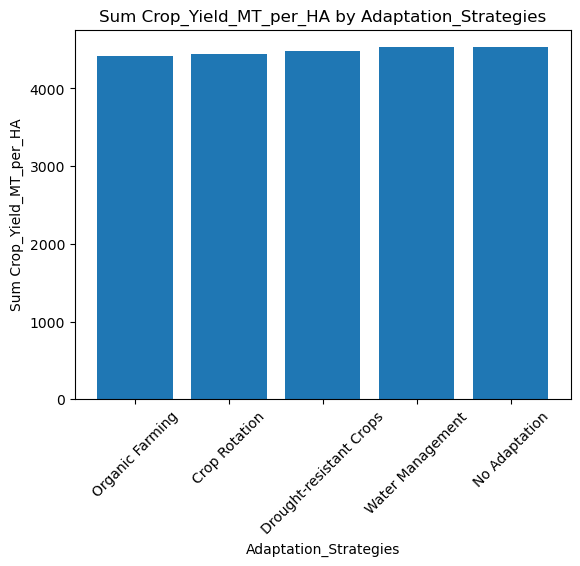

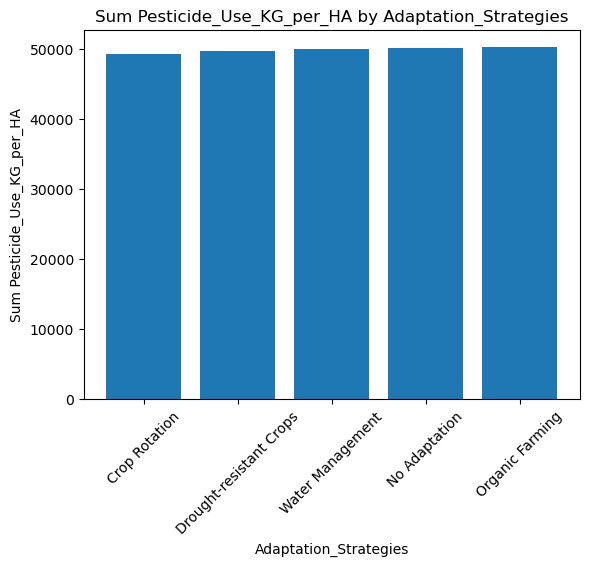

In [11]:
# List of quantitative variables to loop through
vars = ['CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA']

# Loop through each quantitative variable
for var in vars:
    plot_bar_matplotlib(cc_impact_on_ag_df, 'Adaptation_Strategies', var, 'sum')

## Box Plots

In [12]:
def box_plot(df, categorical_var, numerical_var):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=categorical_var, y=numerical_var, data=df)
    plt.title(f'Box Plot of {numerical_var} by {categorical_var}')
    plt.xlabel(categorical_var)
    plt.ylabel(numerical_var)
    plt.xticks(rotation=45)
    plt.show()

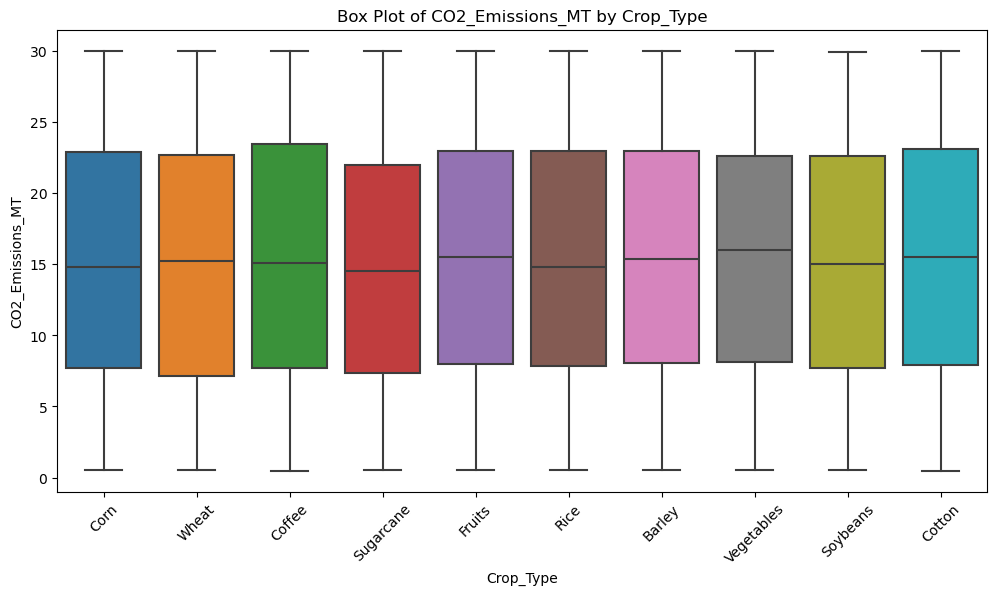

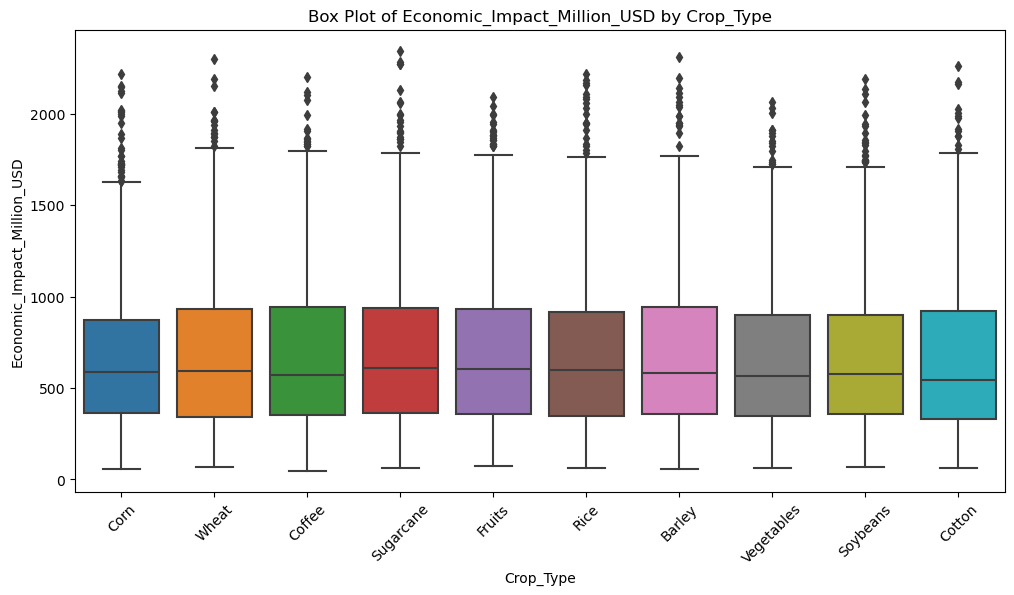

In [13]:
# List of numerical variables to iterate over
numerical_vars = ['CO2_Emissions_MT', 'Economic_Impact_Million_USD'] 

# Loop through each numerical variable and call the function
for num_var in numerical_vars:
    box_plot(cc_impact_on_ag_df, 'Crop_Type', num_var)


## Line plots

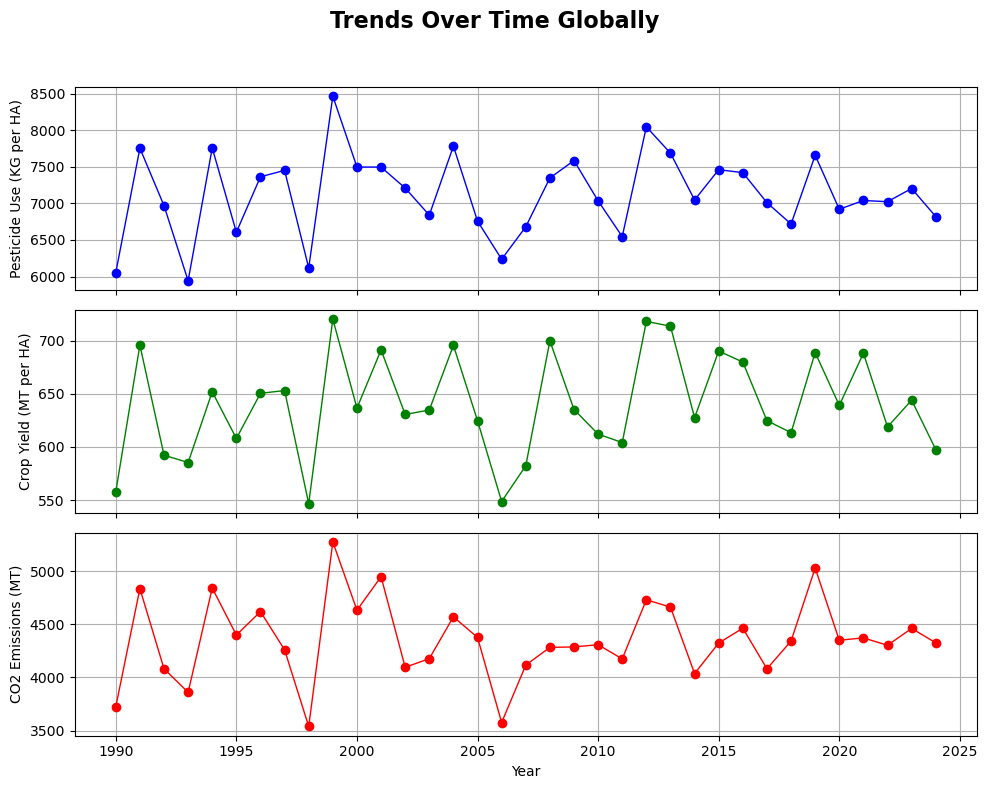

In [14]:
# Grouping the data by 'Year' and summing them for each variable
pesticide_use = cc_impact_on_ag_df.groupby('Year')['Pesticide_Use_KG_per_HA'].sum()
co2_emissions = cc_impact_on_ag_df.groupby('Year')['CO2_Emissions_MT'].sum()
crop_yield = cc_impact_on_ag_df.groupby('Year')['Crop_Yield_MT_per_HA'].sum()

# Create subplots (3 stacked plots sharing the same x-axis)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(10, 8))

# Add a main title for all subplots
fig.suptitle("Trends Over Time Globally", fontsize=16, fontweight="bold")

# Plot Pesticide Use
ax1.plot(pesticide_use.index, pesticide_use.values, linewidth=1, marker="o", color="blue")
ax1.set_ylabel("Pesticide Use (KG per HA)")
ax1.grid(True)

# Plot Crop Yield
ax2.plot(crop_yield.index, crop_yield.values, linewidth=1, marker="o", color="green")
ax2.set_ylabel("Crop Yield (MT per HA)")
ax2.grid(True)

# Plot CO2 Emissions
ax3.plot(co2_emissions.index, co2_emissions.values, linewidth=1, marker="o", color="red")
ax3.set_ylabel("CO2 Emissions (MT)")
ax3.set_xlabel("Year")
ax3.grid(True)

# Show the plot with adjusted layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # This gives space for the main title

plt.show()


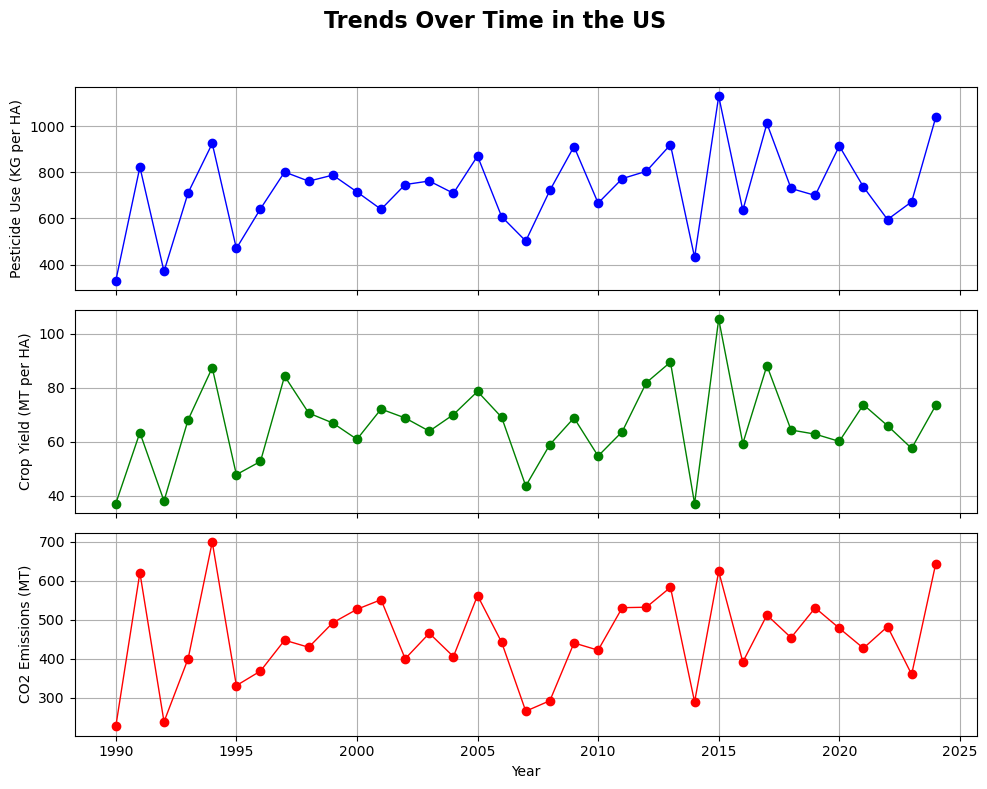

In [15]:
# Filter the DataFrame to include only rows for the USA
usa_data = cc_impact_on_ag_df[cc_impact_on_ag_df['Country'] == 'USA']

# Grouping the filtered data by 'Year' and summing them for each variable
pesticide_use = usa_data.groupby('Year')['Pesticide_Use_KG_per_HA'].sum()
crop_yield = usa_data.groupby('Year')['Crop_Yield_MT_per_HA'].sum()
co2_emissions = usa_data.groupby('Year')['CO2_Emissions_MT'].sum()

# Create subplots (3 stacked plots sharing the same x-axis)
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(10, 8))

# Add a main title for all subplots
fig.suptitle("Trends Over Time in the US", fontsize=16, fontweight="bold")

# Plot Pesticide Use
ax1.plot(pesticide_use.index, pesticide_use.values, linewidth=1, marker="o", color="blue")
ax1.set_ylabel("Pesticide Use (KG per HA)")
ax1.grid(True)

# Plot Crop Yield
ax2.plot(crop_yield.index, crop_yield.values, linewidth=1, marker="o", color="green")
ax2.set_ylabel("Crop Yield (MT per HA)")
ax2.grid(True)

# Plot CO2 Emissions
ax3.plot(co2_emissions.index, co2_emissions.values, linewidth=1, marker="o", color="red")
ax3.set_ylabel("CO2 Emissions (MT)")
ax3.set_xlabel("Year")
ax3.grid(True)

# Show the plot with adjusted layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # This gives space for the main title
plt.show()


In [16]:
# need to fix this

# fig, ax = plt.subplots(figsize=(12, 6))

# # Plotting the data
# grouped_data.plot(kind='line', ax=ax)

# # Add title and labels
# ax.set_title('CO2 Emissions Trends by Crop Type Over Time', fontsize=14)
# ax.set_ylabel('CO2 Emissions (MT)', fontsize=12)
# ax.set_xlabel('Year', fontsize=12)

# # Move the legend to the right outside the plot and adjust the figure to fit everything
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Crop Type')

# # Adjust the layout to make more room for the plot itself
# fig.subplots_adjust(right=0.75) 

# # Ensure the full x-axis range and all data is visible
# ax.set_xlim(grouped_data.index.get_level_values(0).min(), grouped_data.index.get_level_values(0).max())

# plt.show()


In [17]:
# Count occurrences of each country
country_counts = cc_impact_on_ag_df['Country'].value_counts()

# Display
country_counts

Country
USA          1032
Australia    1032
China        1031
Nigeria      1029
India        1025
Canada        984
Argentina     984
France        978
Russia        961
Brazil        944
Name: count, dtype: int64

In [18]:
# Define the country and region filters
country = 'USA'

# Filter the DataFrame for the specific country
filtered_df = cc_impact_on_ag_df[cc_impact_on_ag_df['Country'] == country]

# Count occurrences of each region in that country
region_counts = filtered_df['Region'].value_counts()

# Display the counts
region_counts

Region
South        263
Northeast    259
West         257
Midwest      253
Name: count, dtype: int64

In [19]:
# # Define the filters
# country = 'USA'
# region = 'South'

# # Filter the DataFrame for the specific country and region
# filtered_df = cc_impact_on_ag_df[(cc_impact_on_ag_df['Country'] == country) & (cc_impact_on_ag_df['Region'] == region)]


# # Count occurrences in the 'Crop_Type' column for that country
# crop_type_counts = filtered_df['Crop_Type'].value_counts()

# # Display the counts
# crop_type_counts

In [20]:
# Define the filters
country = 'USA'

# Filter the DataFrame for the specific country 
filtered_df = cc_impact_on_ag_df[cc_impact_on_ag_df['Country'] == country]


# Count occurrences in the 'Crop_Type' column for that country
crop_type_counts = filtered_df['Crop_Type'].value_counts()

# Display the counts
crop_type_counts

Crop_Type
Coffee        118
Vegetables    118
Barley        113
Rice          107
Cotton        101
Sugarcane      99
Wheat          98
Fruits         98
Corn           95
Soybeans       85
Name: count, dtype: int64

In [21]:
# def plot_correlation(df, country, region, crop_type, x_label, y_label):
#     # Filter the DataFrame for the specific country, region, and crop type
#     filtered_df = df[
#         (df['Country'] == country) &
#         (df['Region'] == region) &
#         (df['Crop_Type'] == crop_type)
#     ]

#     # Get x and y data
#     x = filtered_df[x_label]
#     y = filtered_df[y_label]

#     # Check if x and y have enough data points
#     if len(x) < 2 or len(y) < 2:
#         print("Not enough data points to perform correlation analysis.")
#         return

#     # Perform linear regression
#     slope, intercept, r, p, std_err = linregress(x, y)
#     line = slope * x + intercept

#     # Create the scatter plot
#     plt.scatter(x, y)
#     plt.plot(x, line, "--", color='red')  # Use red dashed line for the regression line
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.title(f"{x_label} vs {y_label} for {country}")
#     plt.show()

#     # Print the Pearson correlation coefficient
#     correlation_coefficient = round(pearsonr(x, y)[0], 2)
#     print(f"The correlation coefficient between {x_label} and {y_label} is {correlation_coefficient}")

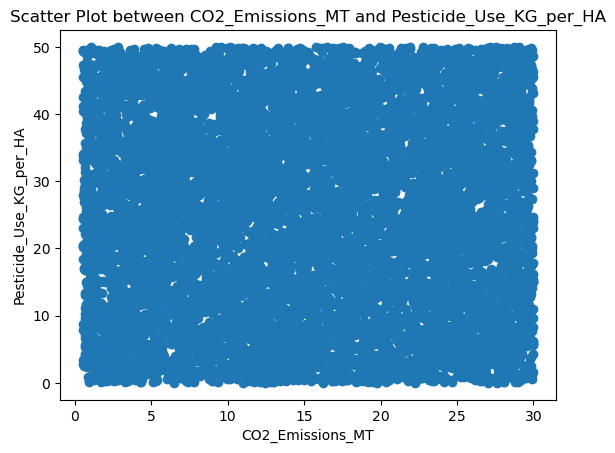

In [22]:
x = 'CO2_Emissions_MT'
y = 'Pesticide_Use_KG_per_HA'

plt.scatter(cc_impact_on_ag_df[x], cc_impact_on_ag_df[y])
plt.xlabel(x)  
plt.ylabel(y)  
plt.title(f"Scatter Plot between {x} and {y}")

plt.show()

In [23]:
# # List of numerical variables to iterate over for the last argument
# crop_vars = ['Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA']

# # Loop through each variable and call the function
# for crop_var in crop_vars:
#     plot_correlation(cc_impact_on_ag_df, 'USA', 'South', 'Coffee', 'CO2_Emissions_MT', crop_var)


#### Above, pearsons r = 0.3 for coffee.  This indicates that there is a weak positive correlation between CO2 emissions and pesticide use.  As CO2 increases, there is a slight increase in pesticide use

In [24]:
# # List to iterate over
# crop_types = ['Coffee', 'Barley', 'Cotton', 'Corn','Soybeans'] 

# # Loop through each crop type and call the function
# for crop_type in crop_types:
#     print(f"\n{crop_type}: ")
#     plot_correlation(cc_impact_on_ag_df, 'USA', 'South', crop_type, 'Average_Temperature_C', 'Crop_Yield_MT_per_HA')

#### Above: In the South region of the USA, barley, cotton, corn, and soybeans show a moderate positive correlation between temperature and crop yield.  For coffee, there is a weak positve correleation between temperature and crop yield.  

In [25]:
# # List to iterate over
# crop_types = ['Coffee', 'Barley', 'Rice', 'Corn'] 

# # Loop through each crop type and call the function
# for crop_type in crop_types:
#     print(f"\n{crop_type}: ")
#     plot_correlation(cc_impact_on_ag_df, 'USA', 'South', crop_type, 'CO2_Emissions_MT', 'Pesticide_Use_KG_per_HA')

In [26]:
# country = 'USA'
# crop_type = 'Fruits'
# x_label = 'CO2_Emissions_MT'
# y_label = 'Pesticide_Use_KG_per_HA'

# # Filter the DataFrame for the USA and Fruit
# filtered_df = cc_impact_on_ag_df[
#     (cc_impact_on_ag_df['Country'] == country) &
#     (cc_impact_on_ag_df['Crop_Type'] == crop_type)
# ]

# # Fit the linear regression model to get the residuals
# slope, intercept, r_value, p_value, std_err = linregress(filtered_df[x_label], filtered_df[y_label])

# # Calculate the predicted values
# predicted_values = slope * filtered_df[x_label] + intercept

# # Calculate residuals
# residuals = filtered_df[y_label] - predicted_values

# # Create the residual plot
# sns.residplot(x=filtered_df[x_label], y=residuals, lowess=True, color='blue')
# plt.title('Residual Plot for USA Fruits')
# plt.xlabel(x_label)
# plt.ylabel('Residuals')
# plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0 for reference

# plt.show()


In [53]:
# def plot_correlation_multiple(df, country, region, crop_types, x_label, y_label):

#     # Filter the DataFrame for the specific country, region, and multiple crop types
#     filtered_df = df[
#         (df['Country'] == country) &
#         (df['Region'] == region) &
#         (df['Crop_Type'].isin(crop_types))
#     ]
    
#     # Create scatter plot for each crop type
#     plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
#     for crop_type in crop_types:
#         crop_df = filtered_df[filtered_df['Crop_Type'] == crop_type]
#         x = crop_df[x_label]
#         y = crop_df[y_label]
        
#         # Check if x and y have enough data points
#         if len(x) < 2 or len(y) < 2:
#             print(f"Not enough data points to perform correlation analysis for {crop_type}.")
#             continue
        
#         # Perform linear regression
#         slope, intercept, r, p, std_err = linregress(x, y)
#         line = slope * x + intercept
        
#         # Scatter plot for this crop type
#         plt.scatter(x, y, label=crop_type)
#         plt.plot(x, line, "--", label=f"{crop_type} regression")
    
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.title(f"{x_label} vs {y_label} for {country} in {region}")
#     plt.legend()  # Show legend to differentiate crop types
#     plt.xticks(rotation=45)
#     plt.show()

#     # Print correlation coefficient for each crop type
#     for crop_type in crop_types:
#         crop_df = filtered_df[filtered_df['Crop_Type'] == crop_type]
#         x = crop_df[x_label]
#         y = crop_df[y_label]
#         if len(x) < 2 or len(y) < 2:
#             continue
#         correlation_coefficient = round(pearsonr(x, y)[0], 2)
#         print(f"The correlation coefficient between {x_label} and {y_label} for {crop_type} is {correlation_coefficient}")


In [54]:
# # List of crop types to combine in the same scatter plot
# crop_types = ['Barley', 'Cotton', 'Corn', 'Soybeans']

# # Call the modified function
# plot_correlation_multiple(cc_impact_on_ag_df, 'USA', 'South', crop_types, 'Average_Temperature_C', 'Crop_Yield_MT_per_HA')

#### Above: In the South region of the USA, barley, cotton, corn, and soybeans show a moderate positive correlation between temperature and crop yield. 

In [29]:
# def plot_correlation_combined(df, country, region, crop_types, x_label, y_label):
 
#     # Filter the DataFrame for the specific country, region, and multiple crop types
#     filtered_df = df[
#         (df['Country'] == country) &
#         (df['Region'] == region) &
#         (df['Crop_Type'].isin(crop_types))
#     ]
    
#     # Get combined x and y data
#     x = filtered_df[x_label]
#     y = filtered_df[y_label]
    
#     # Check if x and y have enough data points
#     if len(x) < 2 or len(y) < 2:
#         print("Not enough data points to perform correlation analysis.")
#         return

#     # Perform linear regression for the combined data
#     slope, intercept, r, p, std_err = linregress(x, y)
#     line = slope * x + intercept

#     # Create the scatter plot for combined data
#     plt.scatter(x, y, label='Combined Crops')
#     plt.plot(x, line, "--", color='red', label=f"Combined regression line")
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.title(f"{x_label} vs {y_label} for {country} in {region} (Combined Crops)")
#     plt.legend()  # Show legend for the regression line
#     plt.xticks(rotation=45)
#     plt.show()

#     # Print the Pearson correlation coefficient for combined data
#     correlation_coefficient = round(pearsonr(x, y)[0], 2)
#     print(f"The combined correlation coefficient between {x_label} and {y_label} for the crops is {correlation_coefficient}")


In [30]:
# # List of crop types to combine in the same scatter plot
# crop_types = ['Barley', 'Cotton', 'Corn', 'Soybeans']

# # Call the modified function
# plot_correlation_combined(cc_impact_on_ag_df, 'USA', 'South', crop_types, 'Average_Temperature_C', 'Crop_Yield_MT_per_HA')

In [31]:
# def plot_correlation_two(df, country, region, x_label, y_label):
    
#     # Filter the DataFrame for the specific country and region
#     filtered_df = df[
#         (df['Country'] == country) &
#         (df['Region'] == region)
#     ]

#     # Get x and y data
#     x = filtered_df[x_label]
#     y = filtered_df[y_label]

#     # Check if x and y have enough data points
#     if len(x) < 2 or len(y) < 2:
#         print("Not enough data points to perform correlation analysis.")
#         return

#     # Perform linear regression
#     slope, intercept, r, p, std_err = linregress(x, y)
#     line = slope * x + intercept

#     # Create the scatter plot
#     plt.scatter(x, y)
#     plt.plot(x, line, "--", color='red')  # Use red dashed line for the regression line
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
#     plt.title(f"{x_label} vs {y_label} for {country} in {region}")
#     plt.show()

#     # Print the Pearson correlation coefficient
#     correlation_coefficient = round(pearsonr(x, y)[0], 2)
#     print(f"The correlation coefficient between {x_label} and {y_label} is {correlation_coefficient}")


In [32]:
# # List of numerical variables for the last argument
# crop_vars = ['Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index']

# # Loop through each variable and call the function
# for var in crop_vars:
#     plot_correlation_two(cc_impact_on_ag_df, 'USA', 'South', 'CO2_Emissions_MT', var)


In [33]:
# # List of numerical variables for the last argument
# crop_vars = ['CO2_Emissions_MT', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index'] 

# # Loop through each variable and call the function
# for var in crop_vars:
#     plot_correlation_two(cc_impact_on_ag_df, 'USA', 'South', var, 'Crop_Yield_MT_per_HA')

In [34]:
# # List to iterate over
# crop_vars = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
#              'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index',
#             ]

# # Loop through each crop type and call the function
# for var in crop_vars:
#     plot_correlation_two(cc_impact_on_ag_df, 'USA', 'South', 'Year', var)

In [35]:
def plot_correlation_three(df, country, crop_type, x_label, y_label):
    
    # Filter the DataFrame for the specific country and crop type
    filtered_df = df[
        (df['Country'] == country) &
        (df['Crop_Type'] == crop_type)
    ]

    # Get x and y data
    x = filtered_df[x_label]
    y = filtered_df[y_label]

    # Check if x and y have enough data points
    if len(x) < 2 or len(y) < 2:
        print("Not enough data points to perform correlation analysis.")
        return

    # Perform linear regression
    slope, intercept, r, p, std_err = linregress(x, y)
    line = slope * x + intercept

    # Create the scatter plot
    plt.scatter(x, y)
    plt.plot(x, line, "--", color='red')  # Use red dashed line for the regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs {y_label} for {country}")
    plt.show()

    # Print the Pearson correlation coefficient
    correlation_coefficient = round(pearsonr(x, y)[0], 2)
    print(f"The correlation coefficient between {x_label} and {y_label} is {correlation_coefficient}")

### Q: Does CO2 effect crop yield different per crop type? 


Coffee: 


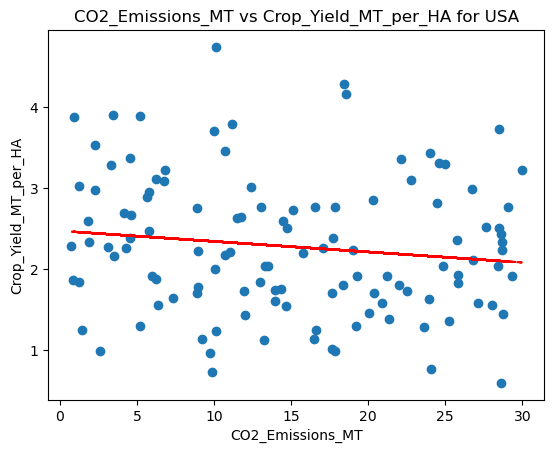

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.14

Vegetables: 


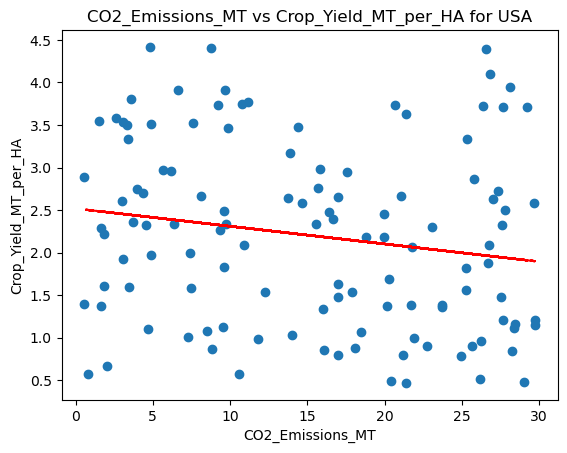

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.18

Barley: 


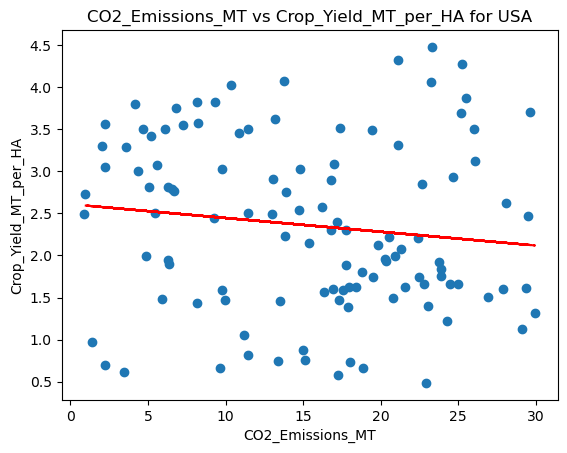

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.13

Rice: 


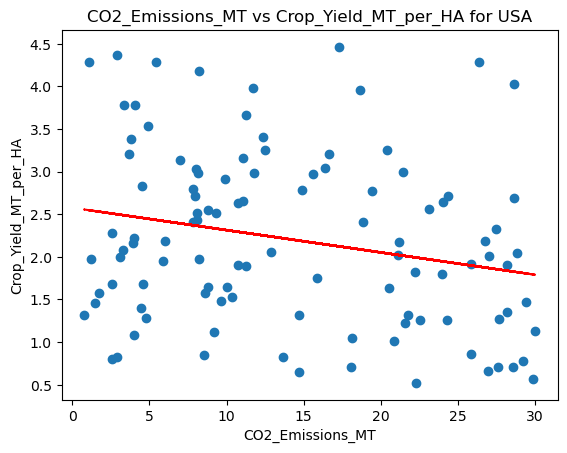

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.23

Cotton: 


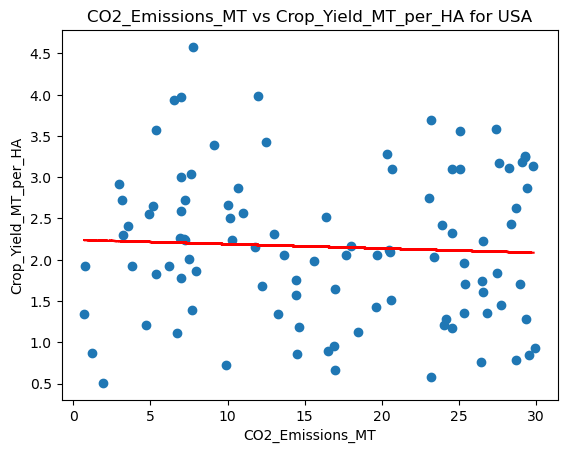

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.05

Sugarcane: 


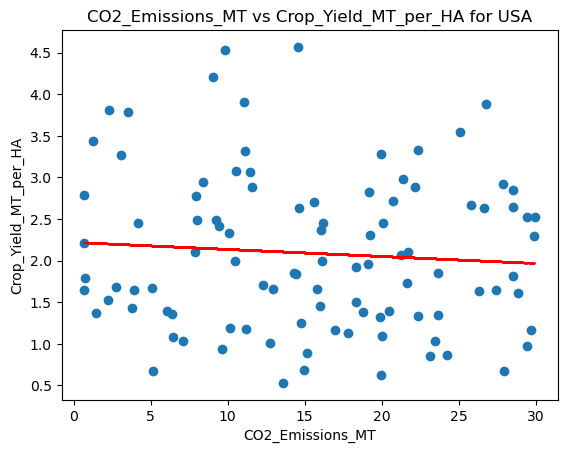

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.08

Wheat: 


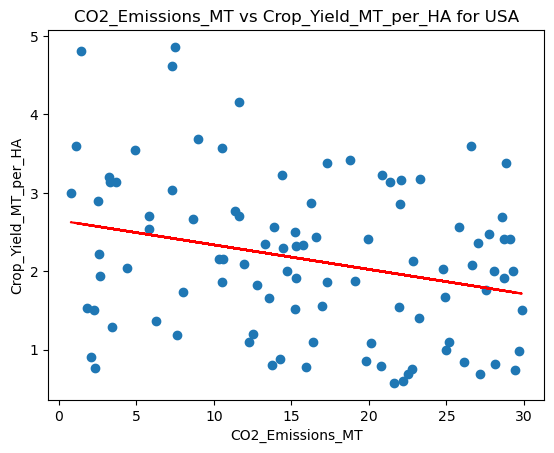

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.28

Fruits: 


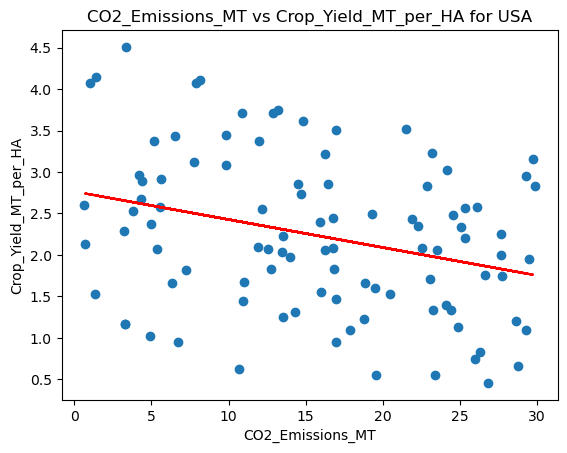

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.31

Corn: 


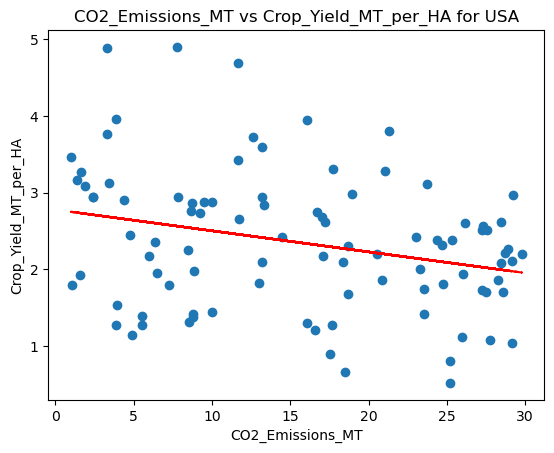

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.28

Soybeans: 


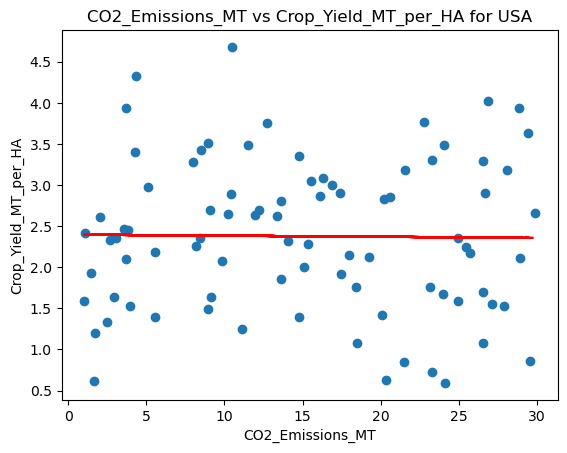

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.01


In [36]:
# List to iterate over
crop_types = ['Coffee', 'Vegetables', 'Barley', 'Rice','Cotton','Sugarcane','Wheat','Fruits','Corn','Soybeans'] 

# Loop through each crop type and call the function
for crop_type in crop_types:
    print(f"\n{crop_type}: ")
    plot_correlation_three(cc_impact_on_ag_df, 'USA', crop_type, 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA')

#### A: This data does not show a strong correlation between CO2 and crop yield.  Pearsons r = -0.31 for fruits is still a weak correlation.  

In [37]:
# # List to iterate over
# crop_vars = ['Average_Temperature_C', 'Total_Precipitation_mm', 'Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA']

# # Loop through each crop type and call the function
# for var in crop_vars:
#     plot_correlation_three(cc_impact_on_ag_df, 'USA', 'Fruits', 'CO2_Emissions_MT', var)

In [55]:
# # List to iterate over
# crop_vars = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events',
#              'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index'
#             ]

# # Loop through each crop type and call the function
# for var in crop_vars:
#     plot_correlation_three(cc_impact_on_ag_df, 'USA', 'Fruits', var, 'Crop_Yield_MT_per_HA')

### Q: Does average temperature affect crop yield? 


Coffee: 


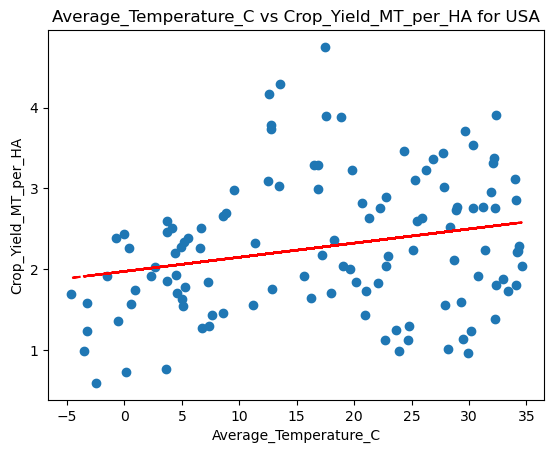

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.24

Vegetables: 


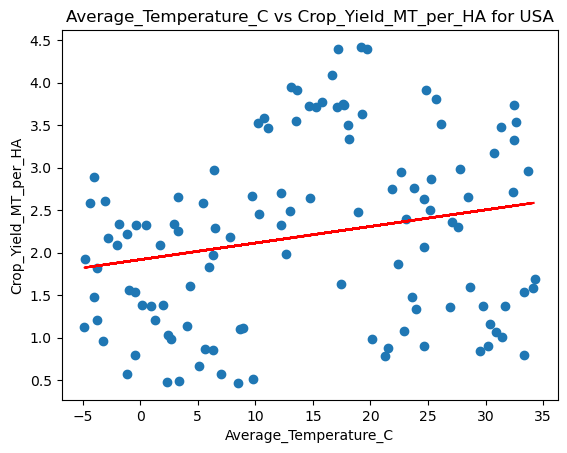

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.22

Barley: 


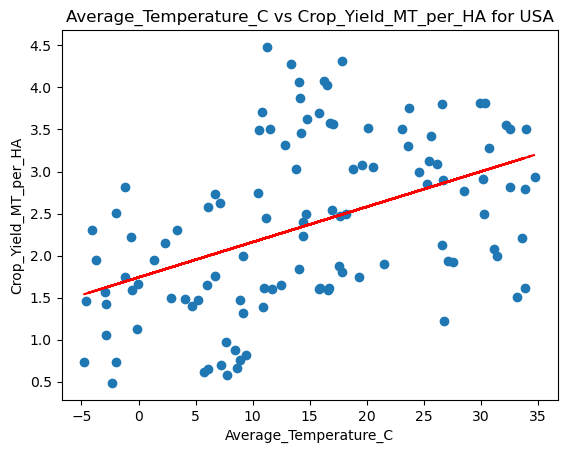

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.46

Rice: 


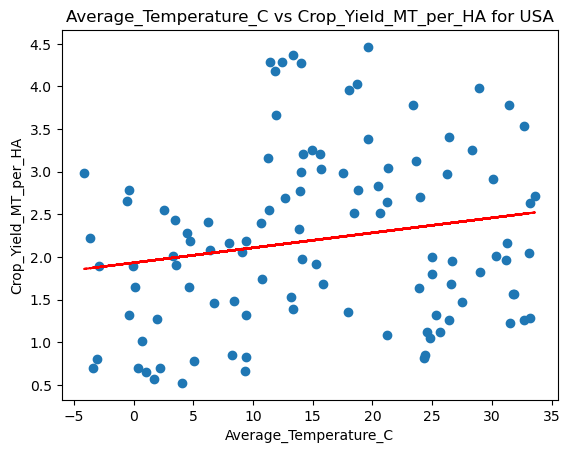

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.19

Cotton: 


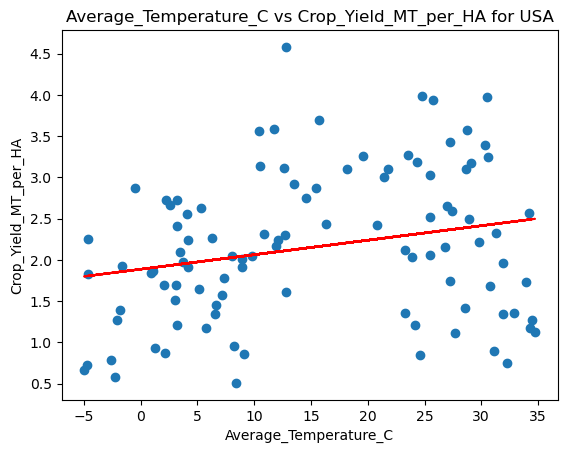

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.24

Sugarcane: 


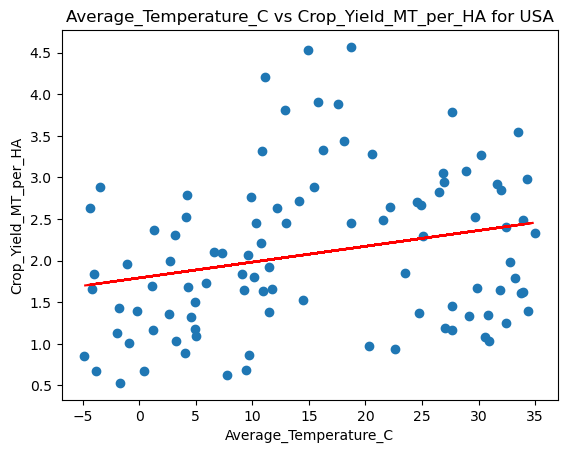

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.25

Wheat: 


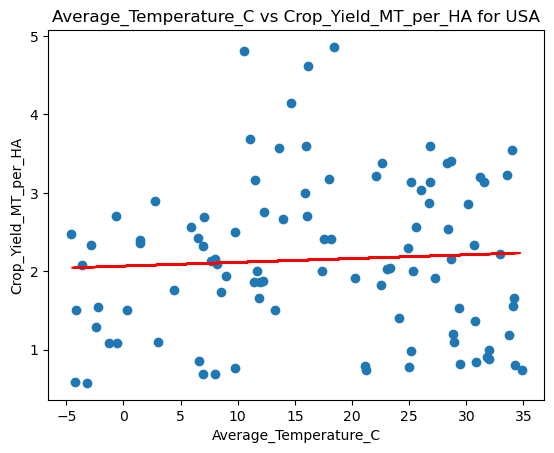

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.06

Fruits: 


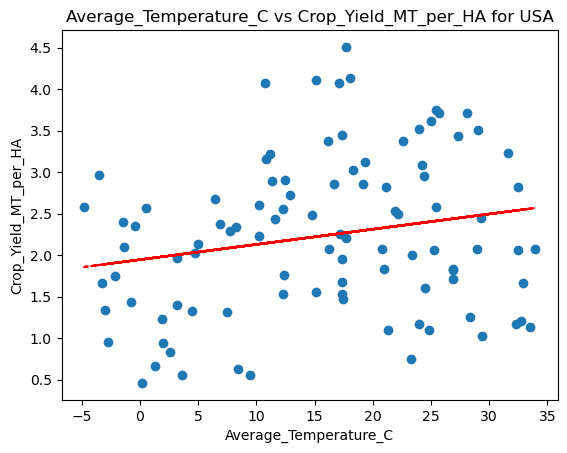

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.21

Corn: 


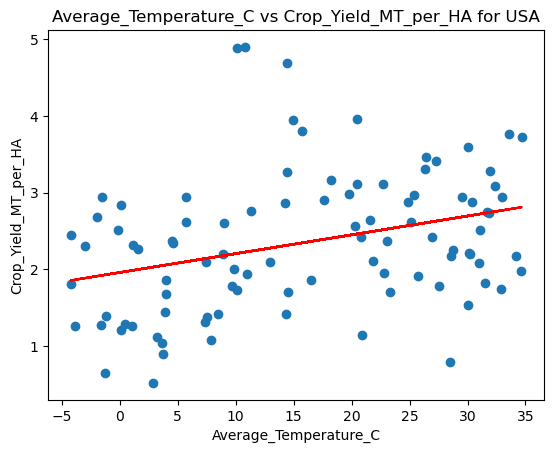

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.33

Soybeans: 


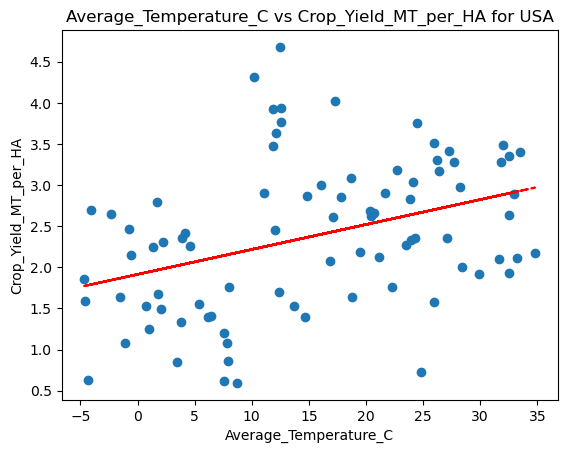

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.38


In [39]:
# List to iterate over
crop_types = ['Coffee', 'Vegetables', 'Barley', 'Rice','Cotton','Sugarcane','Wheat','Fruits','Corn','Soybeans'] 

# Loop through each crop type and call the function
for crop_type in crop_types:
    print(f"\n{crop_type}: ")
    plot_correlation_three(cc_impact_on_ag_df, 'USA', crop_type, 'Average_Temperature_C', 'Crop_Yield_MT_per_HA')

### A: The pearsons r above show a moderate positive correlation between temperature and crop yield for barley; we observe a weak positive correlation for corn and soybeans.  We do see somewhat of a peak in the middle for all the scatter plots, suggesting that there is a central tendency of temperature that is optimal for crop growth.  


Coffee: 


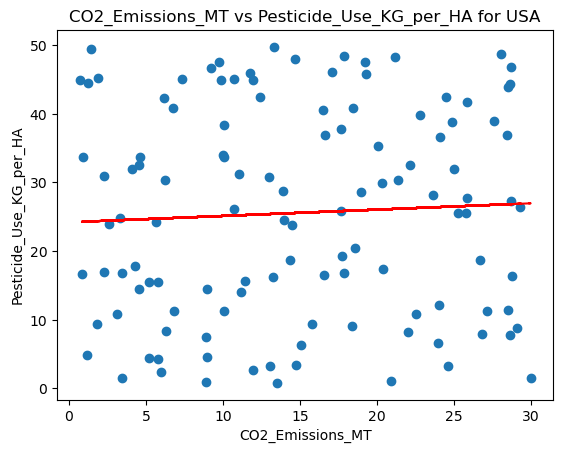

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is 0.05

Vegetables: 


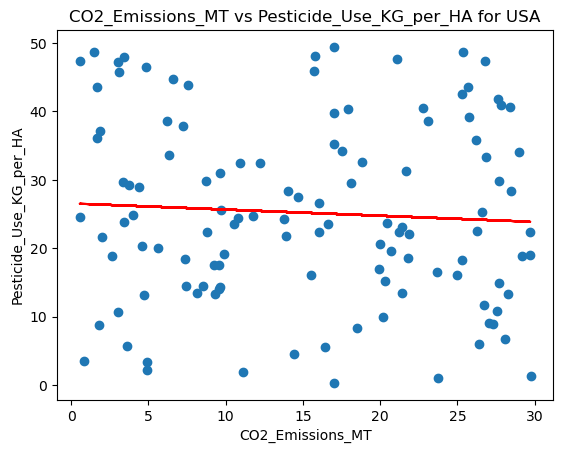

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is -0.06

Barley: 


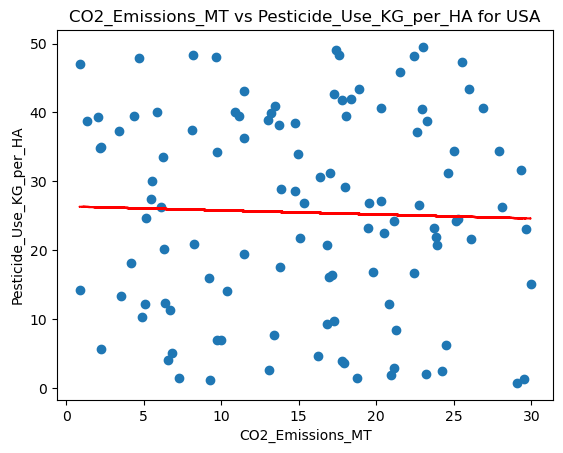

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is -0.03

Rice: 


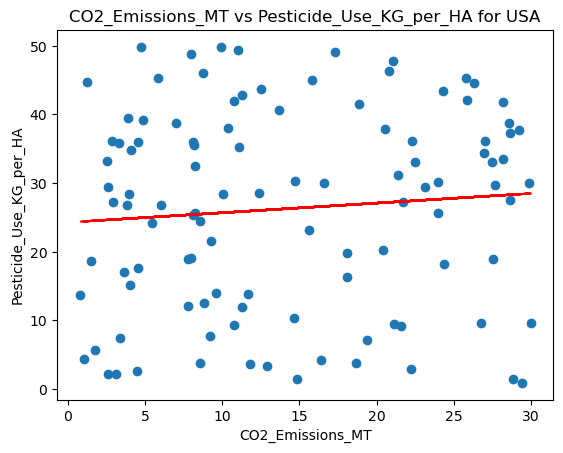

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is 0.09

Cotton: 


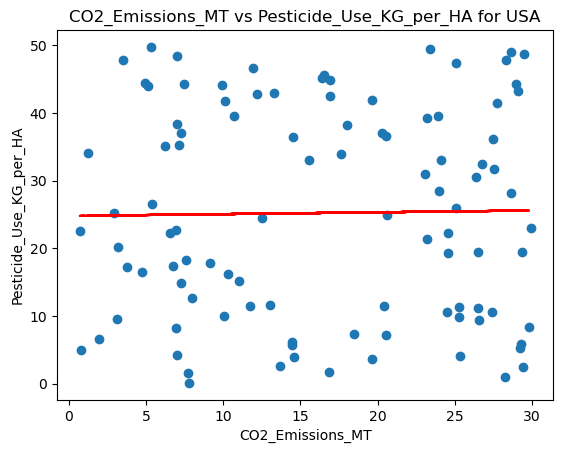

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is 0.02

Sugarcane: 


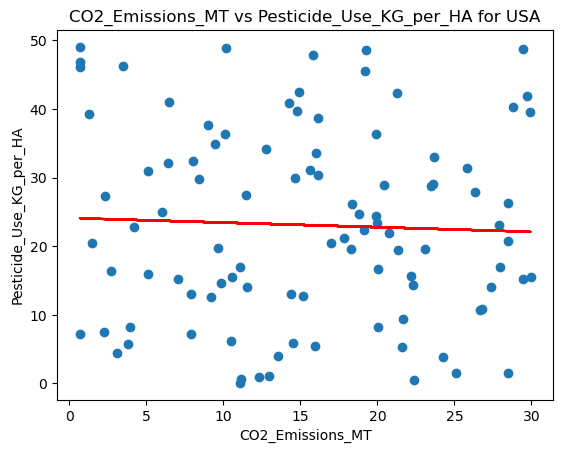

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is -0.04

Wheat: 


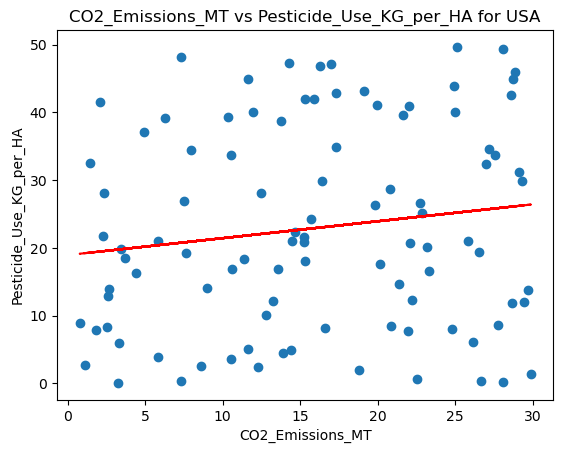

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is 0.15

Fruits: 


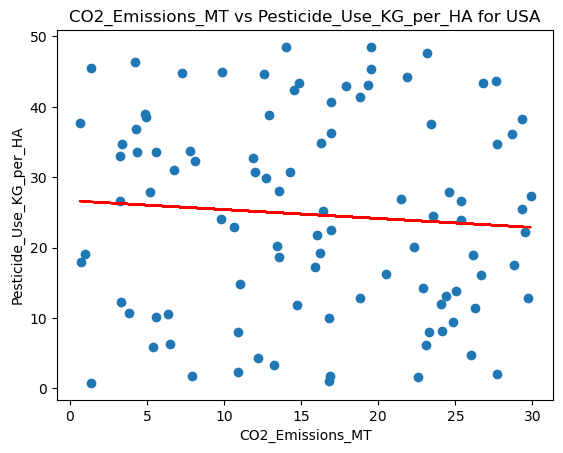

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is -0.08

Corn: 


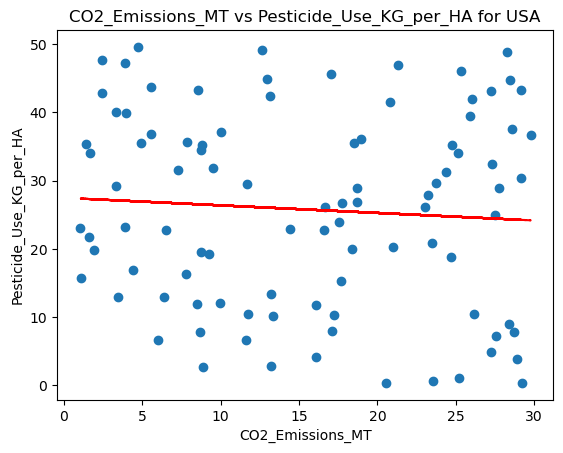

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is -0.07

Soybeans: 


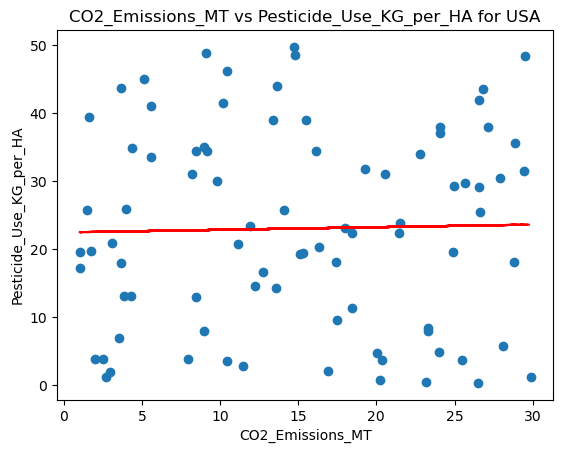

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is 0.02


In [40]:
# # List to iterate over
# crop_types = ['Coffee', 'Vegetables', 'Barley', 'Rice','Cotton','Sugarcane','Wheat','Fruits','Corn','Soybeans'] 

# # Loop through each crop type and call the function
# for crop_type in crop_types:
#     print(f"\n{crop_type}: ")
#     plot_correlation_three(cc_impact_on_ag_df, 'USA', crop_type, 'CO2_Emissions_MT', 'Pesticide_Use_KG_per_HA')

### Q: What else is correlated with the crop yield of barley? 

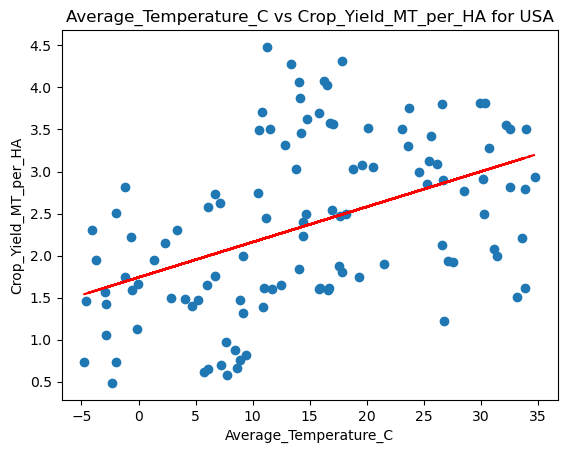

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.46


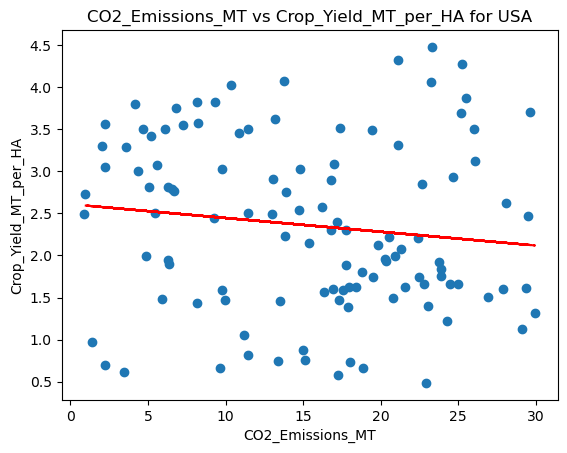

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.13


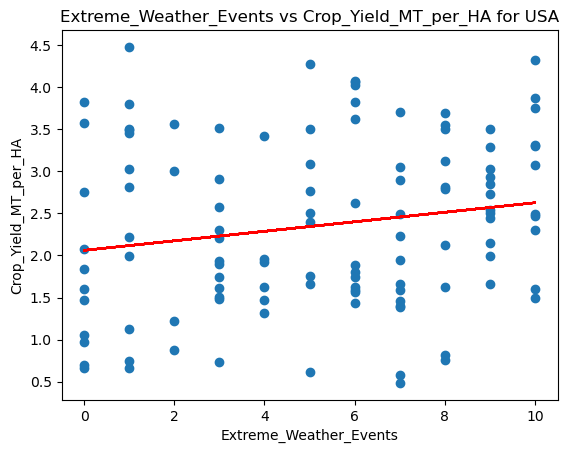

The correlation coefficient between Extreme_Weather_Events and Crop_Yield_MT_per_HA is 0.18


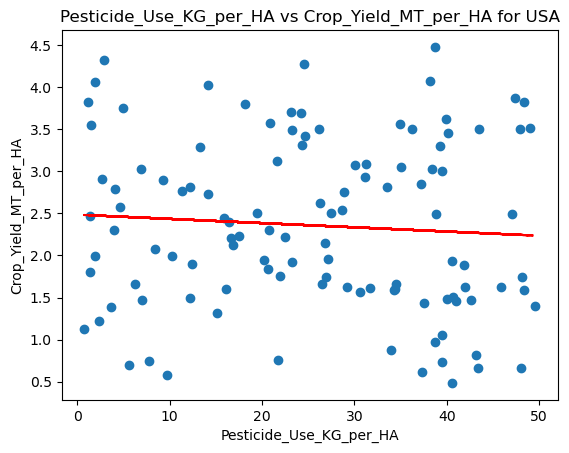

The correlation coefficient between Pesticide_Use_KG_per_HA and Crop_Yield_MT_per_HA is -0.07


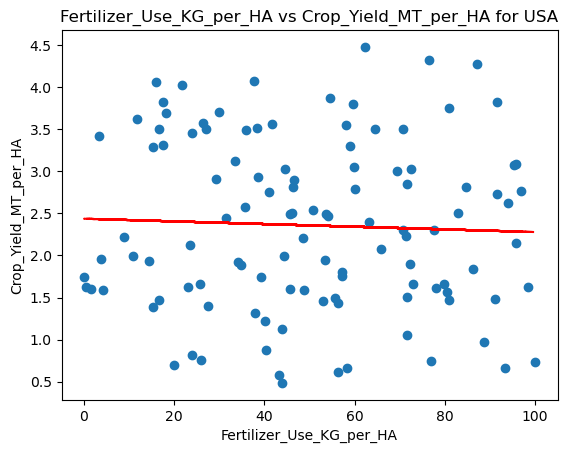

The correlation coefficient between Fertilizer_Use_KG_per_HA and Crop_Yield_MT_per_HA is -0.04


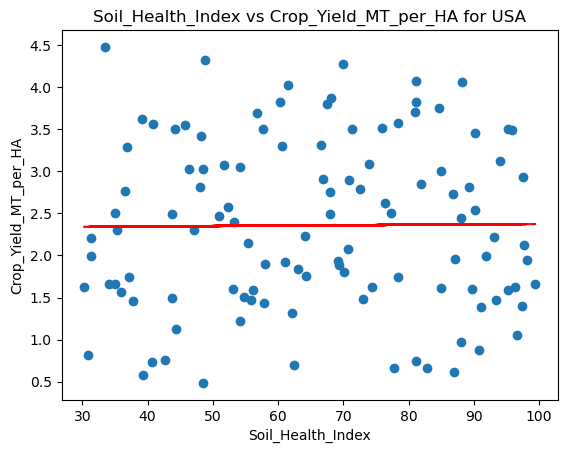

The correlation coefficient between Soil_Health_Index and Crop_Yield_MT_per_HA is 0.01


In [41]:
# List to iterate over
crop_vars = ['Average_Temperature_C', 'CO2_Emissions_MT', 'Extreme_Weather_Events', 'Pesticide_Use_KG_per_HA',
             'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index'] 

# Loop through each crop type and call the function
for var in crop_vars:
    plot_correlation_three(cc_impact_on_ag_df, 'USA', 'Barley', var, 'Crop_Yield_MT_per_HA')

### A: Temperature seems to be the only variable that is moderately correlated with the crop yield of barley.  

In [42]:
def plot_correlation_four(df, country, x_label, y_label):
    
    # Filter the DataFrame for the specific country
    filtered_df = df[df['Country'] == country]

    # Get x and y data
    x = filtered_df[x_label]
    y = filtered_df[y_label]

    # Check if x and y have enough data points
    if len(x) < 2 or len(y) < 2:
        print("Not enough data points to perform correlation analysis.")
        return

    # Perform linear regression
    slope, intercept, r, p, std_err = linregress(x, y)
    line = slope * x + intercept

    # Create the scatter plot
    plt.scatter(x, y)
    plt.plot(x, line, "--", color='red')  # Use red dashed line for the regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs {y_label} for {country}")
    plt.show()

    # Print the Pearson correlation coefficient
    correlation_coefficient = round(pearsonr(x, y)[0], 2)
    print(f"The correlation coefficient between {x_label} and {y_label} is {correlation_coefficient}")


### Q: Is there a correlation between CO2_Emissions_MT and other variables such as Pesticide_Use_KG_per_HA, Fertilizer_Use_KG_per_HA, Soil_Health_Index, Economic_Impact_Million_USD?

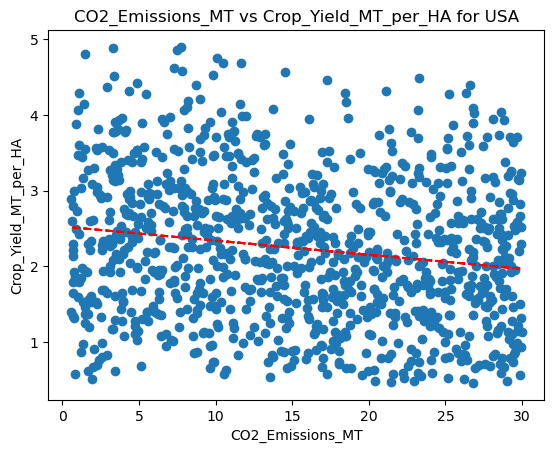

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.17


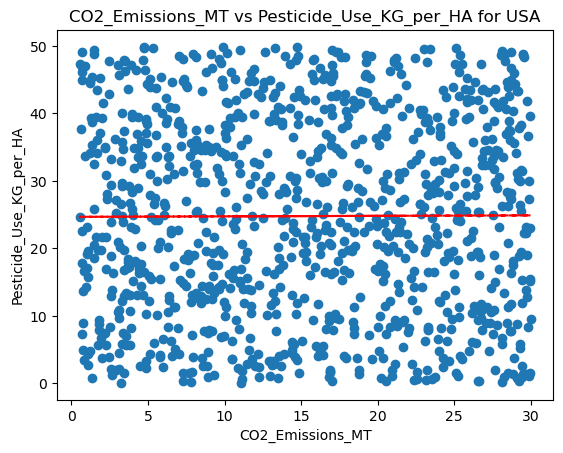

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is 0.0


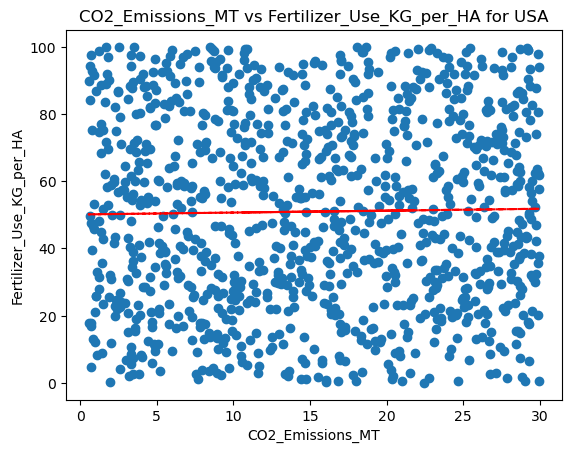

The correlation coefficient between CO2_Emissions_MT and Fertilizer_Use_KG_per_HA is 0.02


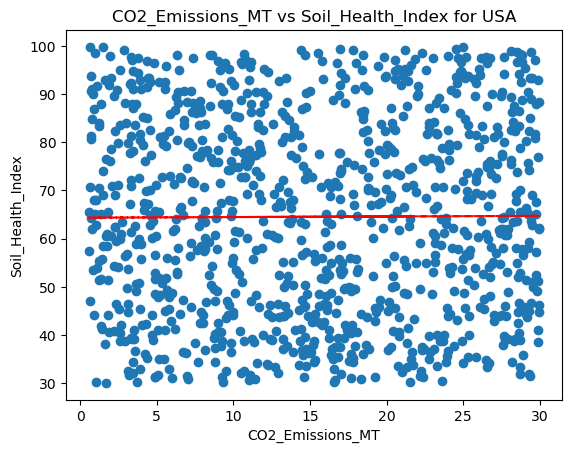

The correlation coefficient between CO2_Emissions_MT and Soil_Health_Index is 0.01


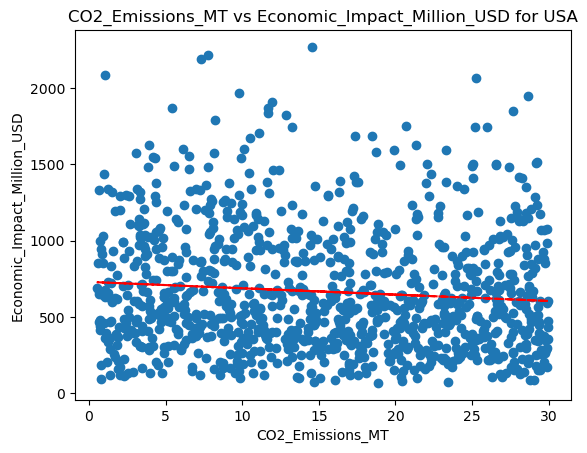

The correlation coefficient between CO2_Emissions_MT and Economic_Impact_Million_USD is -0.09


In [43]:
# List to iterate over
crop_vars = ['Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD'] 

# Loop through each crop type and call the function
for var in crop_vars:
    plot_correlation_four(cc_impact_on_ag_df, 'USA', 'CO2_Emissions_MT', var)

### A: Above, we see little to no correlation between CO2 emissions and the other agriculture variables in the US. 

### Q: Is there a correlation between crop yield and other variables such as 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index'?

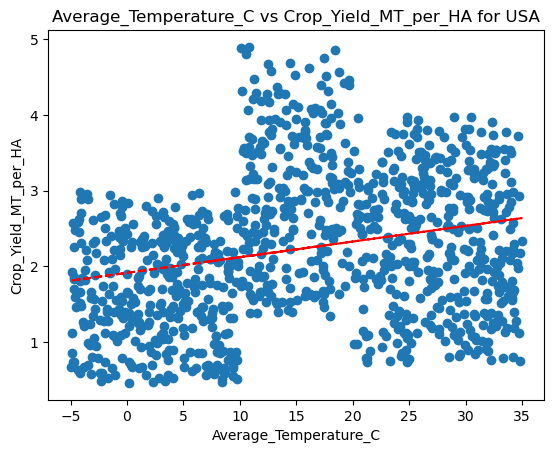

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.25


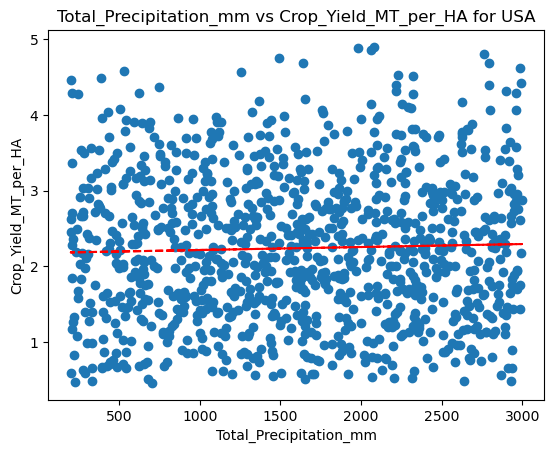

The correlation coefficient between Total_Precipitation_mm and Crop_Yield_MT_per_HA is 0.03


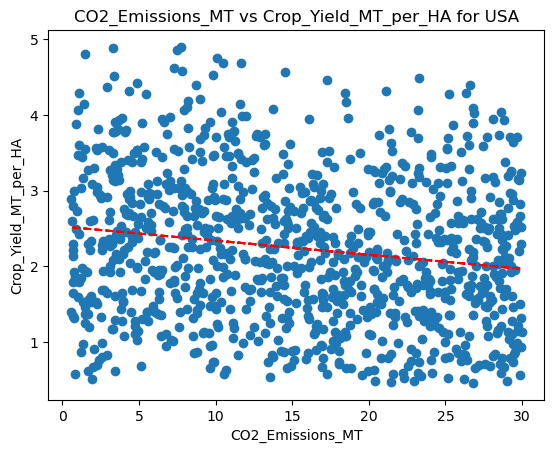

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.17


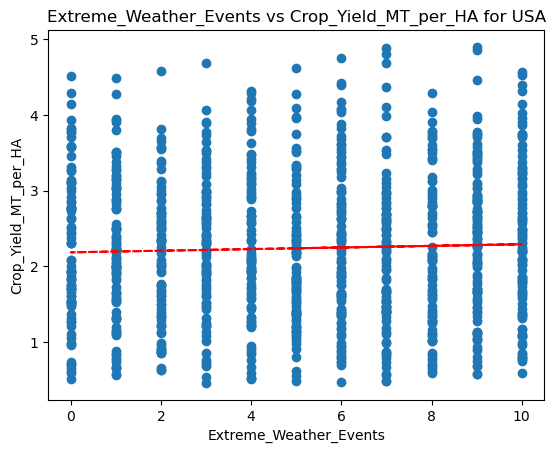

The correlation coefficient between Extreme_Weather_Events and Crop_Yield_MT_per_HA is 0.04


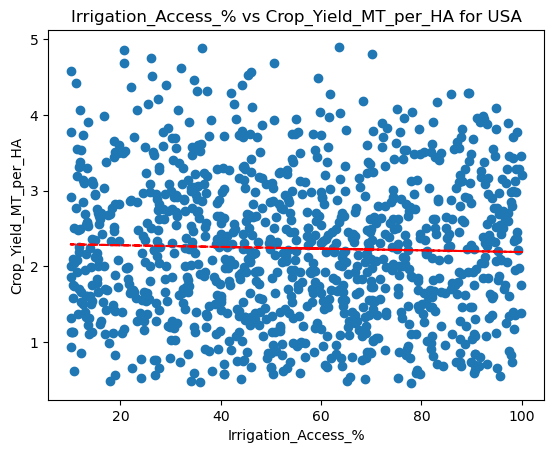

The correlation coefficient between Irrigation_Access_% and Crop_Yield_MT_per_HA is -0.03


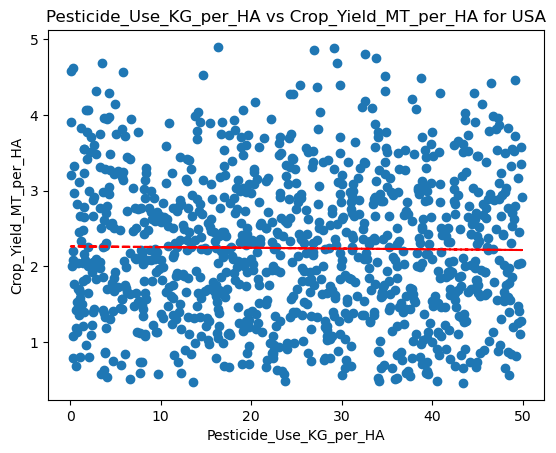

The correlation coefficient between Pesticide_Use_KG_per_HA and Crop_Yield_MT_per_HA is -0.01


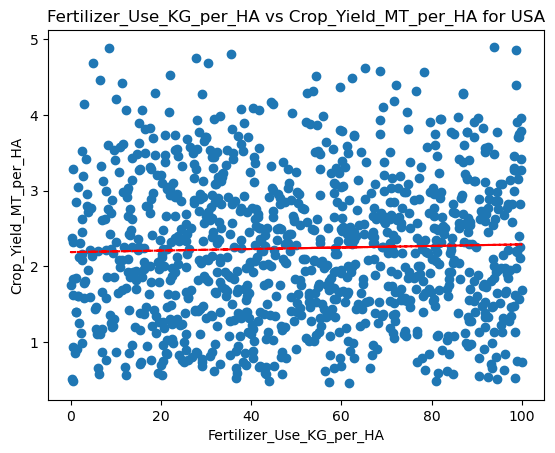

The correlation coefficient between Fertilizer_Use_KG_per_HA and Crop_Yield_MT_per_HA is 0.03


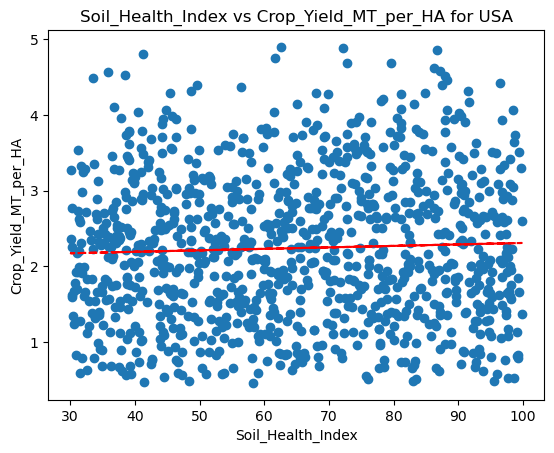

The correlation coefficient between Soil_Health_Index and Crop_Yield_MT_per_HA is 0.04


In [44]:
# List to iterate over
crop_vars = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events',
             'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index'
            ]

# Loop through each crop type and call the function
for var in crop_vars:
    plot_correlation_four(cc_impact_on_ag_df, 'USA', var, 'Crop_Yield_MT_per_HA')

### A: There did not appear to be a correlation between the other variables and crop yield.  

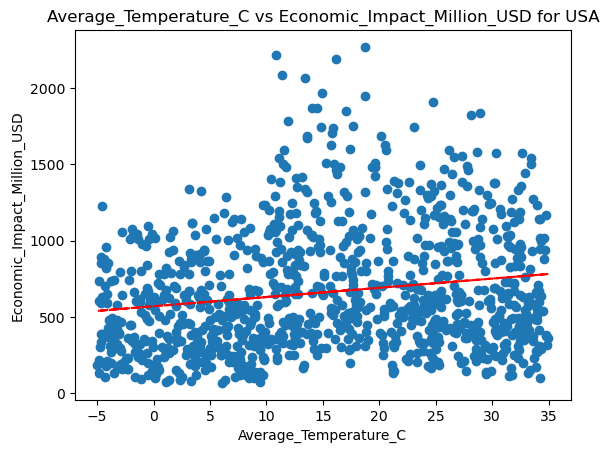

The correlation coefficient between Average_Temperature_C and Economic_Impact_Million_USD is 0.18


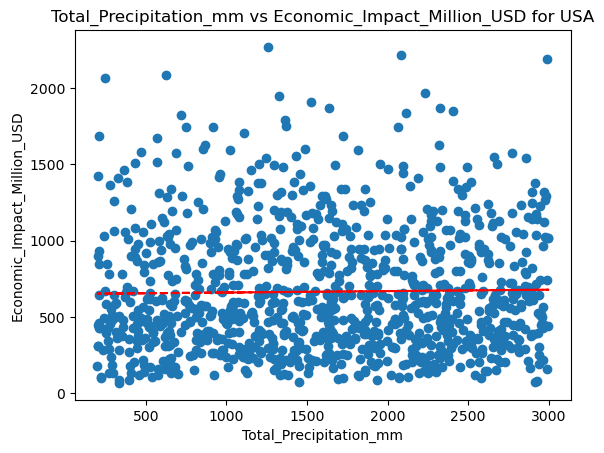

The correlation coefficient between Total_Precipitation_mm and Economic_Impact_Million_USD is 0.02


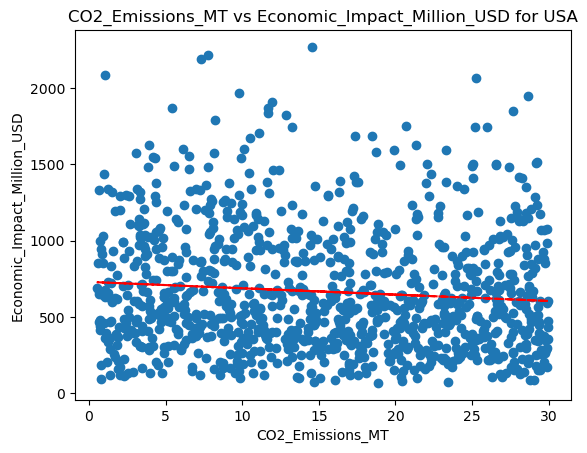

The correlation coefficient between CO2_Emissions_MT and Economic_Impact_Million_USD is -0.09


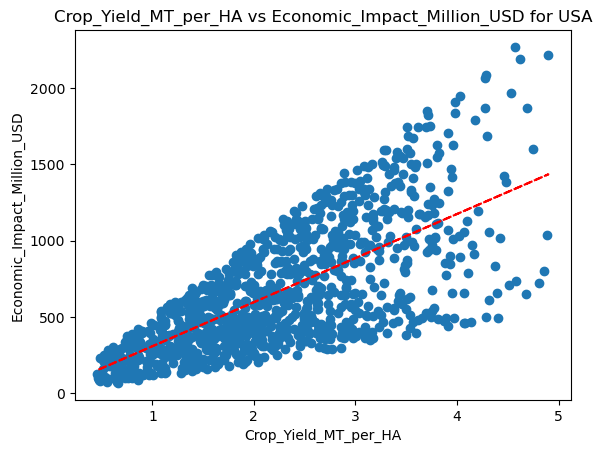

The correlation coefficient between Crop_Yield_MT_per_HA and Economic_Impact_Million_USD is 0.69


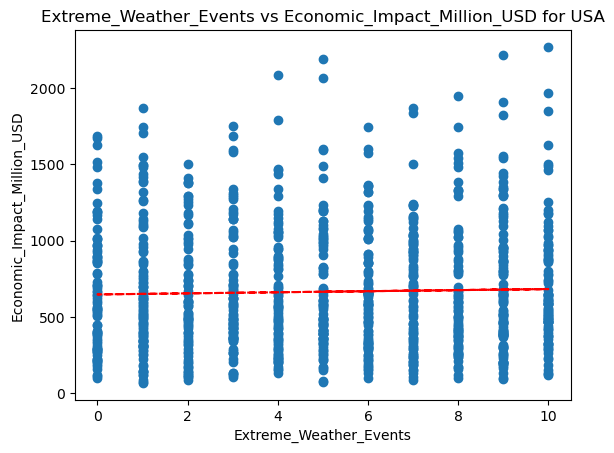

The correlation coefficient between Extreme_Weather_Events and Economic_Impact_Million_USD is 0.03


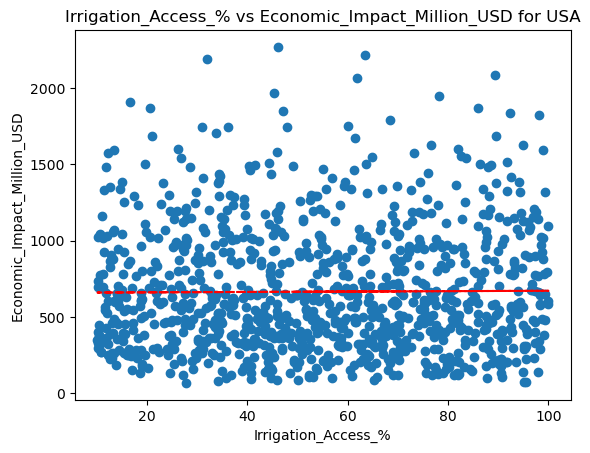

The correlation coefficient between Irrigation_Access_% and Economic_Impact_Million_USD is 0.01


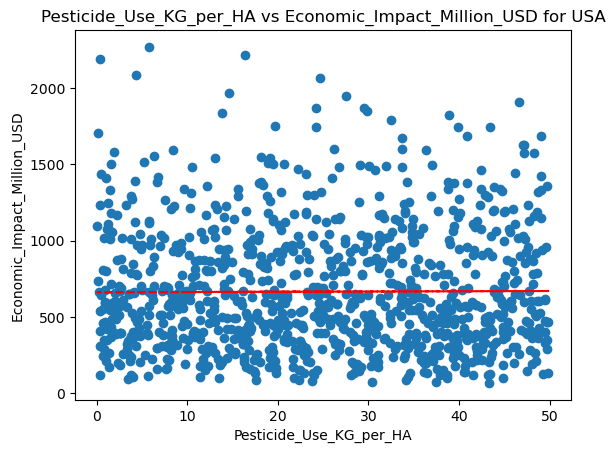

The correlation coefficient between Pesticide_Use_KG_per_HA and Economic_Impact_Million_USD is 0.01


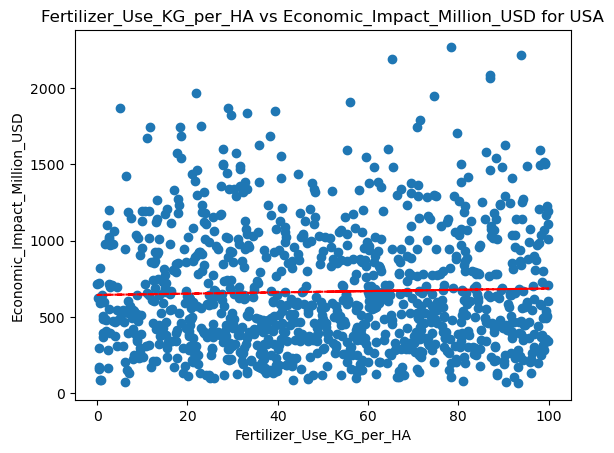

The correlation coefficient between Fertilizer_Use_KG_per_HA and Economic_Impact_Million_USD is 0.03


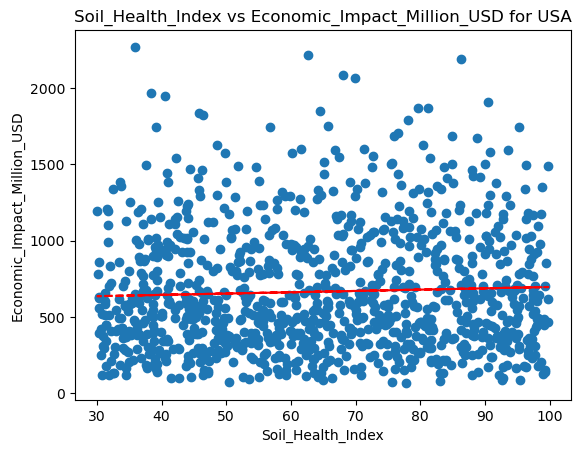

The correlation coefficient between Soil_Health_Index and Economic_Impact_Million_USD is 0.04


In [45]:
# List to iterate over
crop_vars = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events',
             'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index'
            ]

# Loop through each crop type and call the function
for var in crop_vars:
    plot_correlation_four(cc_impact_on_ag_df, 'USA', var, 'Economic_Impact_Million_USD')

#### Variables over time

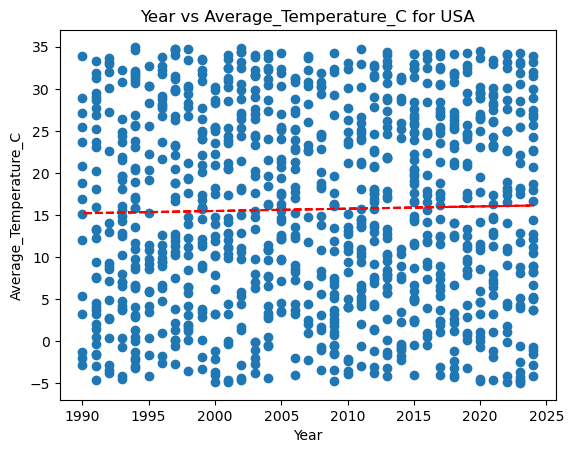

The correlation coefficient between Year and Average_Temperature_C is 0.02


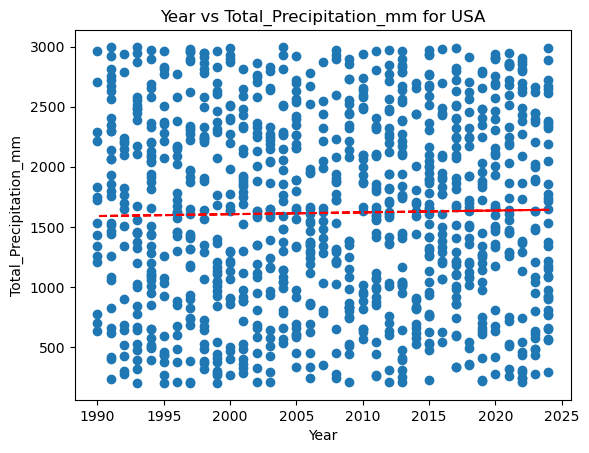

The correlation coefficient between Year and Total_Precipitation_mm is 0.02


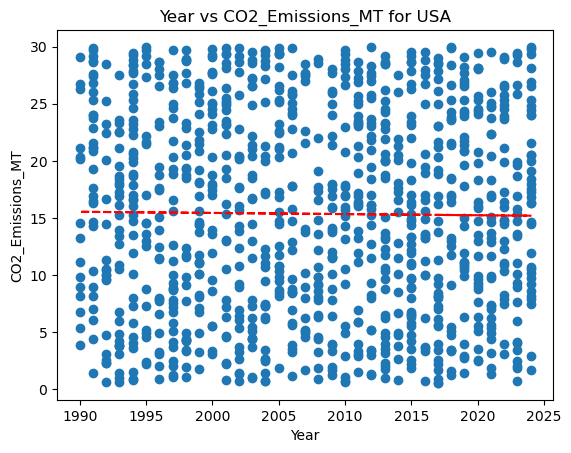

The correlation coefficient between Year and CO2_Emissions_MT is -0.01


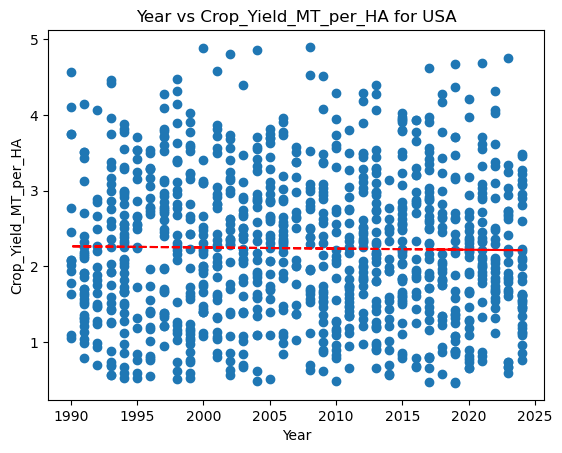

The correlation coefficient between Year and Crop_Yield_MT_per_HA is -0.02


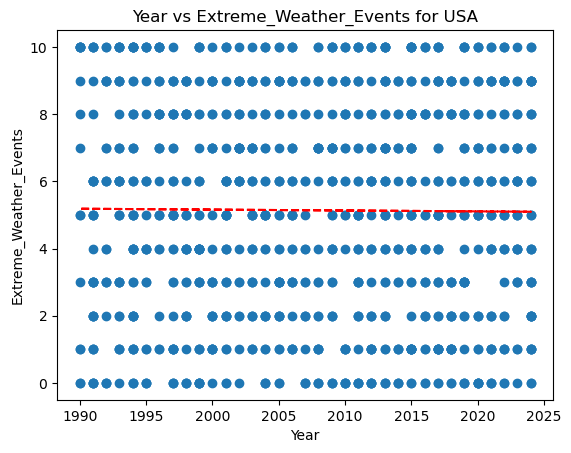

The correlation coefficient between Year and Extreme_Weather_Events is -0.01


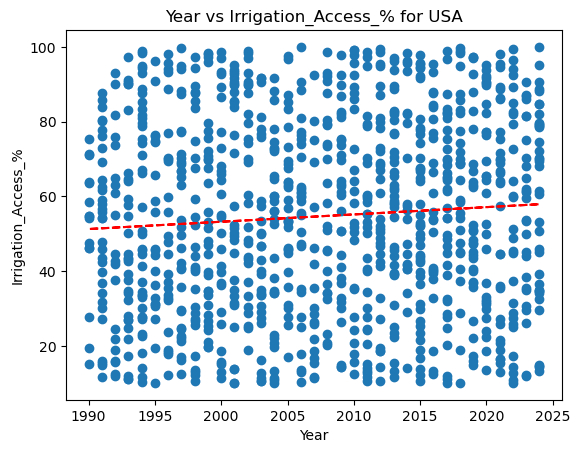

The correlation coefficient between Year and Irrigation_Access_% is 0.08


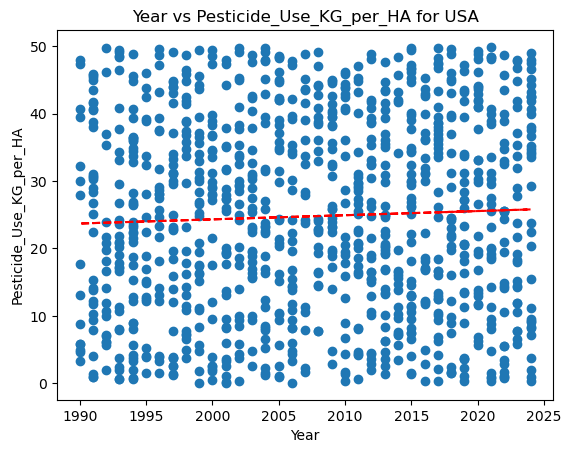

The correlation coefficient between Year and Pesticide_Use_KG_per_HA is 0.04


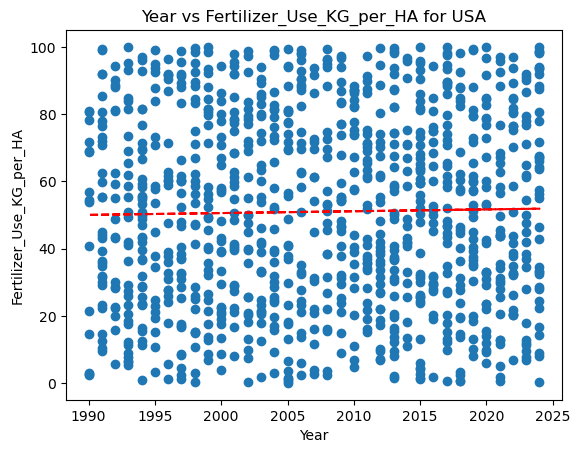

The correlation coefficient between Year and Fertilizer_Use_KG_per_HA is 0.02


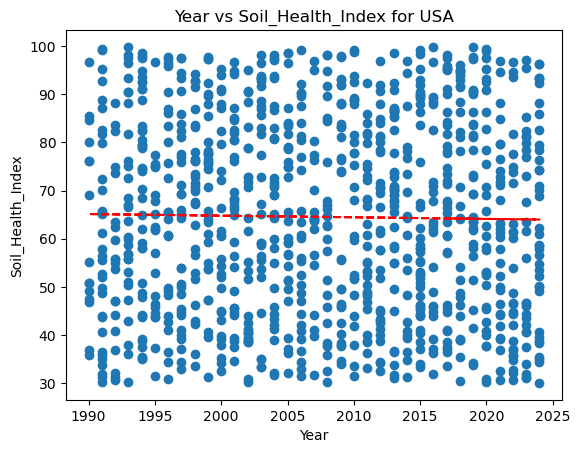

The correlation coefficient between Year and Soil_Health_Index is -0.02


In [47]:
# List to iterate over
crop_vars = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events',
             'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index'
            ]

# Loop through each crop type and call the function
for var in crop_vars:
    plot_correlation_four(cc_impact_on_ag_df, 'USA', 'Year', var)

In [58]:
def plot_correlation_five(df, x_label, y_label, agg_func):
    
    # Group the DataFrame by 'Year' and apply the aggregation function
    if agg_func == 'mean':
        grouped_df = df.groupby('Year')[[x_label, y_label]].mean().dropna()
    elif agg_func == 'sum':
        grouped_df = df.groupby('Year')[[x_label, y_label]].sum().dropna()
    else:
        raise ValueError("agg_func must be either 'mean' or 'sum'")

    # Get x and y data (grouped by Year)
    x = grouped_df[x_label]
    y = grouped_df[y_label]

    # Check if x and y have enough data points
    if len(x) < 2 or len(y) < 2:
        print("Not enough data points to perform correlation analysis.")
        return

    # Perform linear regression
    slope, intercept, r, p, std_err = linregress(x, y)
    line = slope * x + intercept

    # Create the scatter plot
    plt.scatter(x, y)
    plt.plot(x, line, "--", color='red')  # Use red dashed line for the regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs {y_label} (Grouped by Year)")
    plt.show()

    # Print the Pearson correlation coefficient
    correlation_coefficient = round(pearsonr(x, y)[0], 2)
    print(f"The correlation coefficient between {x_label} and {y_label} is {correlation_coefficient}")


In [59]:
## The plots from this cell are not valid because it doesn't make sense to take a sum in this context

# crop_vars = ['Average_Temperature_C', 'Total_Precipitation_mm', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events',
#              'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index'
#             ]

# # Loop through each crop type and call the function
# for var in crop_vars:
#     plot_correlation_five(cc_impact_on_ag_df, 'CO2_Emissions_MT', var, agg_func='sum')

In [60]:
# crop_vars = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events',
#              'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index'
#             ]

# # Loop through each crop type and call the function
# for var in crop_vars:
#     plot_correlation_five(cc_impact_on_ag_df, var, 'Crop_Yield_MT_per_HA', agg_func='sum')

### Q: Is CO2 correlated with the variables 'Average_Temperature_C', 'Total_Precipitation_mm', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index'? 

### A: No correlation found here.  

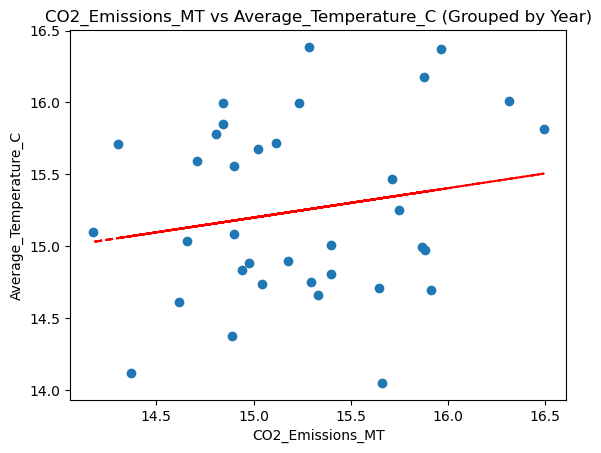

The correlation coefficient between CO2_Emissions_MT and Average_Temperature_C is 0.18


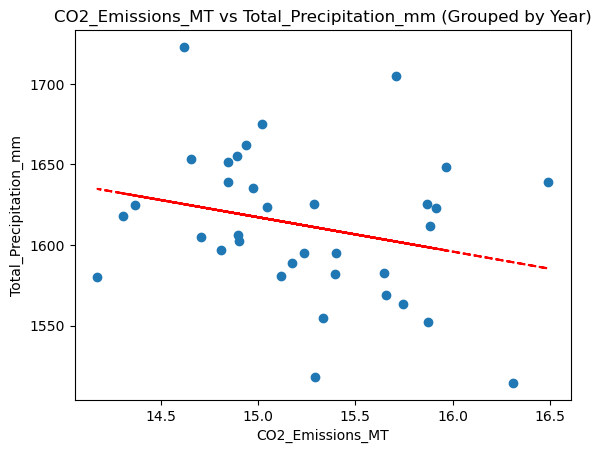

The correlation coefficient between CO2_Emissions_MT and Total_Precipitation_mm is -0.26


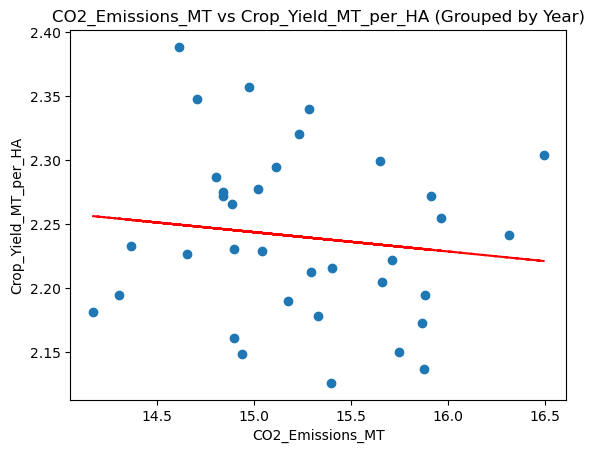

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.13


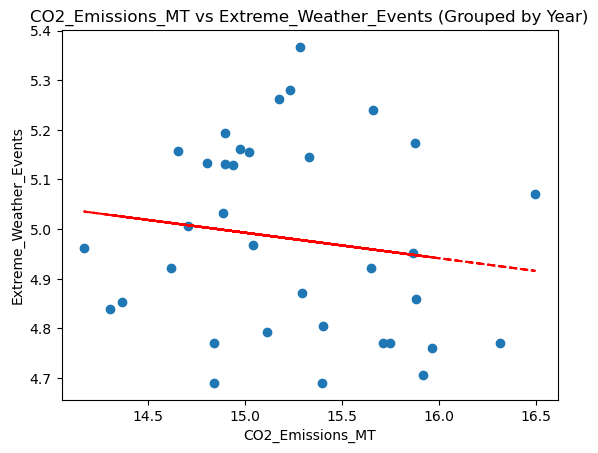

The correlation coefficient between CO2_Emissions_MT and Extreme_Weather_Events is -0.15


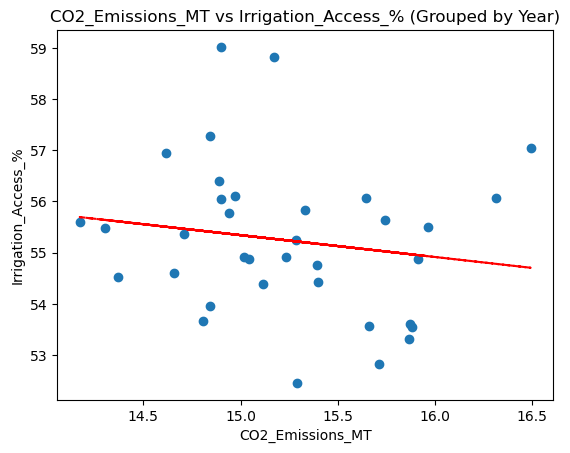

The correlation coefficient between CO2_Emissions_MT and Irrigation_Access_% is -0.16


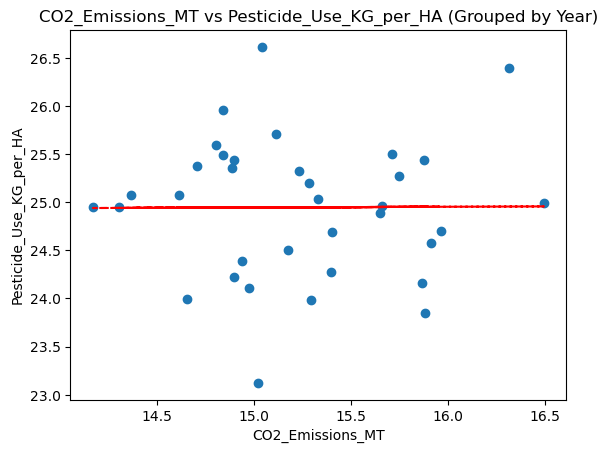

The correlation coefficient between CO2_Emissions_MT and Pesticide_Use_KG_per_HA is 0.01


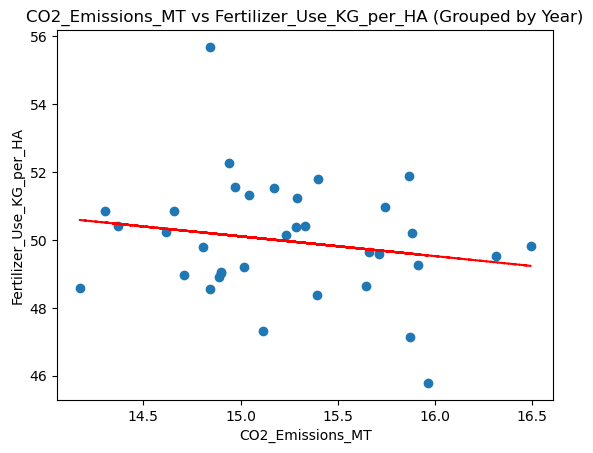

The correlation coefficient between CO2_Emissions_MT and Fertilizer_Use_KG_per_HA is -0.19


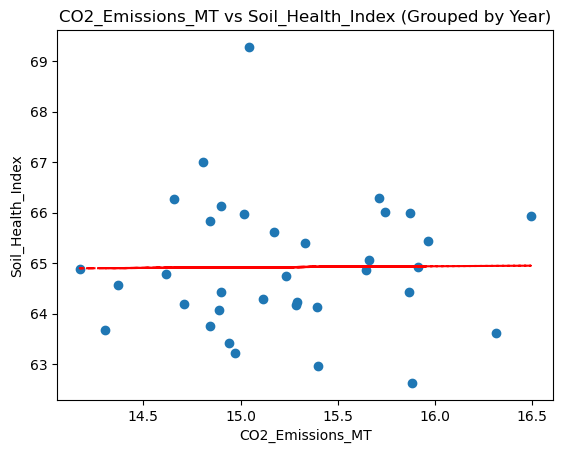

The correlation coefficient between CO2_Emissions_MT and Soil_Health_Index is 0.01


In [61]:
crop_vars = ['Average_Temperature_C', 'Total_Precipitation_mm', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events',
             'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index']

# Loop through each crop type and call the function
for var in crop_vars:
    plot_correlation_five(cc_impact_on_ag_df, 'CO2_Emissions_MT', var, 'mean')

### Q: Is there a correlation between 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index' and crop yield? 
### A: Only a weak correlation, Pearson's r = 0.39 was found between crop yield in metric tons per hectare and total precipitation mm, but still not strong.  Mostlikely due to the fact that technology has allowed for other ways to access water.  

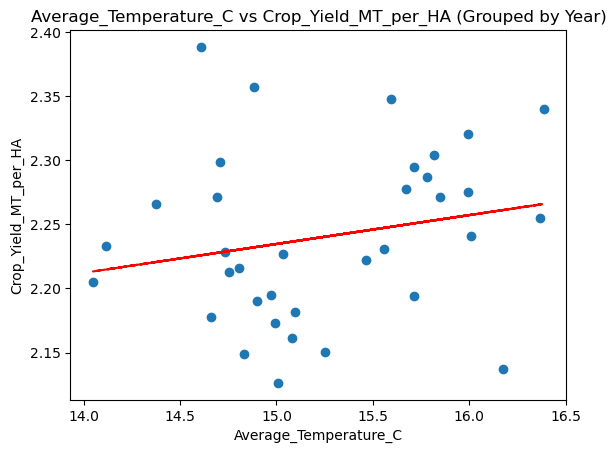

The correlation coefficient between Average_Temperature_C and Crop_Yield_MT_per_HA is 0.21


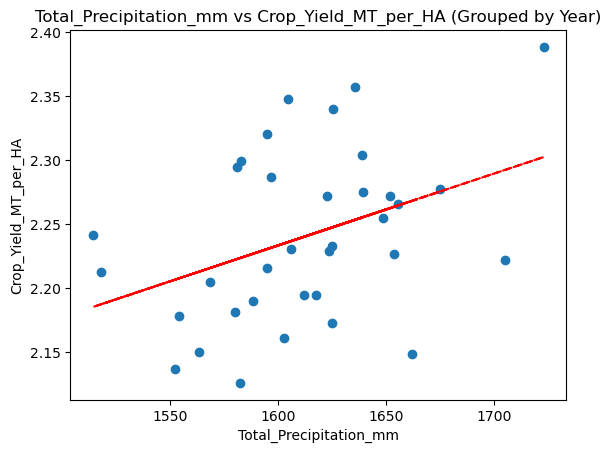

The correlation coefficient between Total_Precipitation_mm and Crop_Yield_MT_per_HA is 0.39


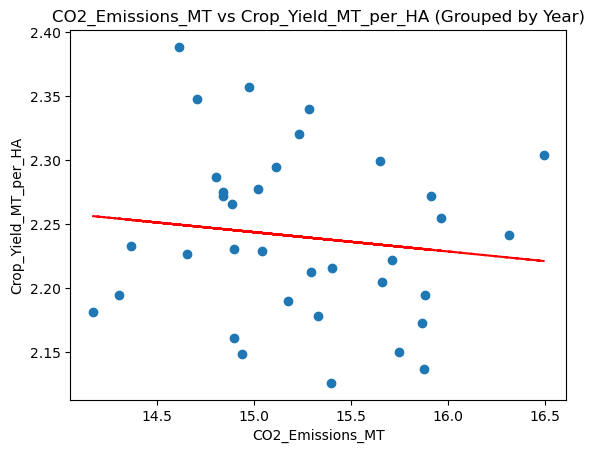

The correlation coefficient between CO2_Emissions_MT and Crop_Yield_MT_per_HA is -0.13


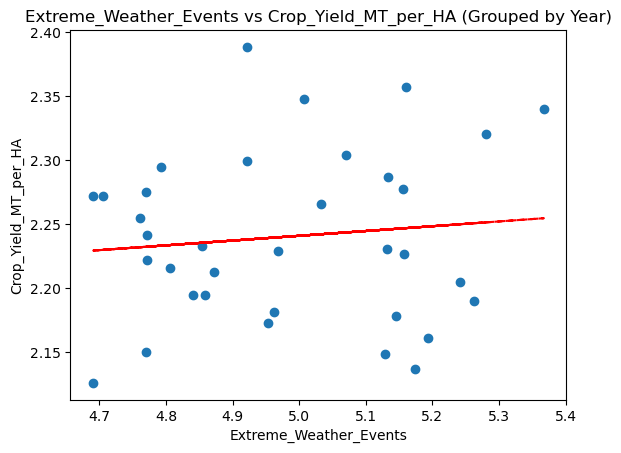

The correlation coefficient between Extreme_Weather_Events and Crop_Yield_MT_per_HA is 0.11


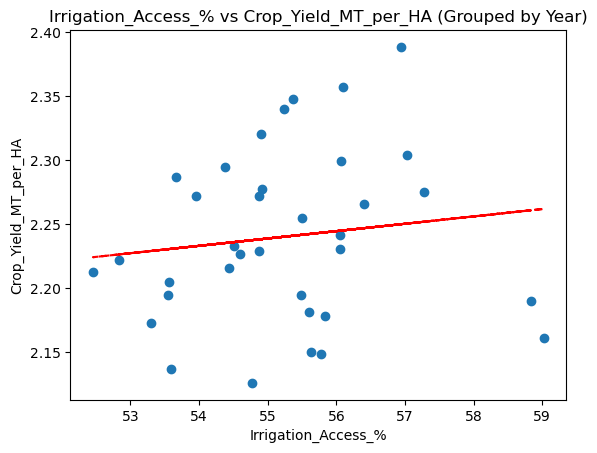

The correlation coefficient between Irrigation_Access_% and Crop_Yield_MT_per_HA is 0.13


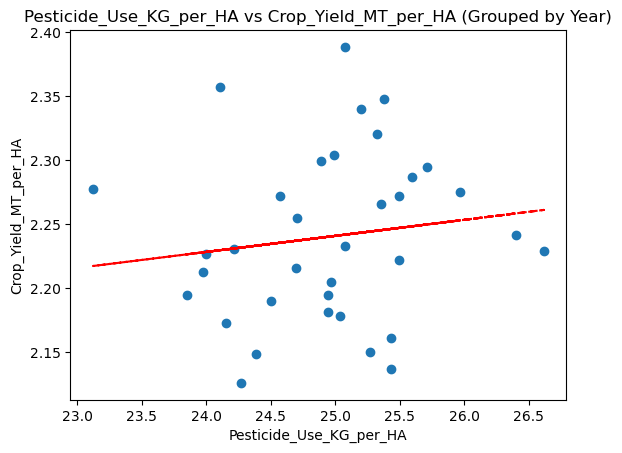

The correlation coefficient between Pesticide_Use_KG_per_HA and Crop_Yield_MT_per_HA is 0.14


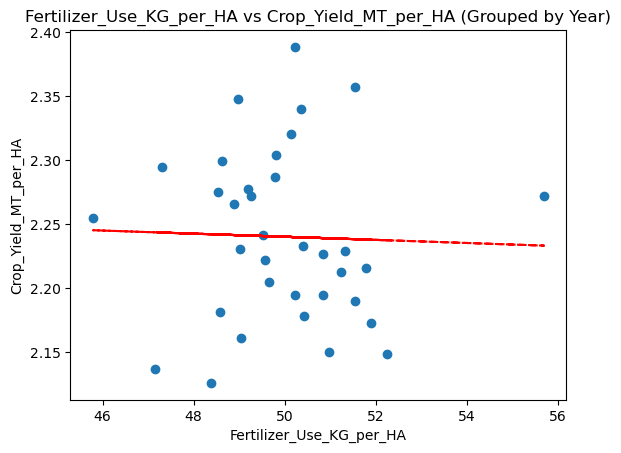

The correlation coefficient between Fertilizer_Use_KG_per_HA and Crop_Yield_MT_per_HA is -0.03


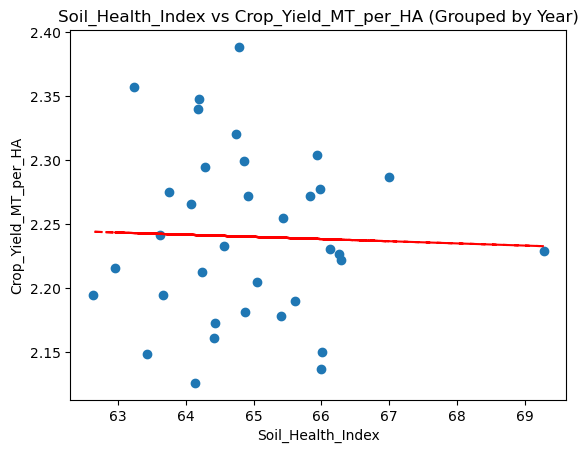

The correlation coefficient between Soil_Health_Index and Crop_Yield_MT_per_HA is -0.03


In [52]:
crop_vars = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events',
             'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index']

# Loop through each crop type and call the function
for var in crop_vars:
    plot_correlation_five(cc_impact_on_ag_df, var, 'Crop_Yield_MT_per_HA', 'mean')

#### Above, pearsons r shows a week or moderately weak positive correlation between crop yield and precipitation.  